In [1]:
!pip install wordcloud


In [2]:

# 1. Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Hiển thị đẹp
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
plt.rcParams['figure.figsize'] = (10,6)


# 2. Load dữ liệu

df_audio = pd.read_csv("../../data/data-top50/usa/spotify-streaming-top-50-usa-with-audio.csv")
df_meta  = pd.read_csv("../../data/data-top50/usa/spotify-streaming-top-50-usa-with-meta-clean.csv")

# Merge theo track_id hoặc spotify_id (nếu có)
df = pd.merge(df_meta, df_audio, on="track_id", how="inner")

print("Kích thước dữ liệu:", df.shape)
df.head()


Kích thước dữ liệu: (27576, 27)


,date,position,song,artist,track_id,popularity,duration_ms,is_explicit,album_id,release_date,...,key,liveness,loudness,mode,speechiness,tempo,valence,tempo_norm,loudness_norm,key_name
0,2023-05-18,1,Ella Baila Sola,Eslabon Armado,3dnP0JxCgygwQH9Gm7q7nb,89,165671,0,3Mm1P5CEEAiuJqBclr2EyU,2023-04-28,...,5.00000,0.083700,-5.176000,0,0.033200,147.989000,0.834000,0.536314,0.913733,F
1,2023-05-18,2,Last Night,Morgan Wallen,583dMdiUquLMenarTp7PQm,89,163854,1,0rnd3h2dc82L4gTjW6Vfoq,2023-03-03,...,5.04729,0.191766,-7.028306,0,0.109011,122.296042,0.463805,0.419527,0.882862,C
2,2023-05-18,3,All My Life (feat. J. Cole),Lil Durk & J. Cole,6HgWWaMu31KdOpEG5l28BG,84,223878,1,0lZQagJ5r0crB35zphSD4A,2023-05-12,...,3.00000,0.135000,-5.881000,1,0.225000,142.974000,0.733000,0.513518,0.901983,D#
3,2023-05-18,4,un x100to,Grupo Frontera & Bad Bunny,6pD0ufEQq0xdHSsRbg9LBK,99,194563,0,7aGzSSUD8S6IhPCsZSiuMT,2023-04-17,...,6.00000,0.270000,-4.076000,0,0.047400,83.118000,0.562000,0.241445,0.932067,F#
4,2023-05-18,5,Kill Bill,SZA,1Qrg8KqiBpW07V7PNxwwwL,94,153946,0,1nrVofqDRs7cpWXJ49qTnP,2022-12-08,...,8.00000,0.161000,-5.747000,1,0.039100,88.980000,0.418000,0.268091,0.904217,G#


In [3]:
df.info()
df.describe()
# thông tin dữ liệu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27576 entries, 0 to 27575
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              27576 non-null  object 
 1   position          27576 non-null  int64  
 2   song              27576 non-null  object 
 3   artist            27576 non-null  object 
 4   track_id          27576 non-null  object 
 5   popularity        27576 non-null  int64  
 6   duration_ms       27576 non-null  int64  
 7   is_explicit       27576 non-null  int64  
 8   album_id          27576 non-null  object 
 9   release_date      27576 non-null  object 
 10  genres            27576 non-null  object 
 11  main_genre        27576 non-null  object 
 12  href              27576 non-null  object 
 13  acousticness      27576 non-null  float64
 14  danceability      27576 non-null  float64
 15  energy            27576 non-null  float64
 16  instrumentalness  27576 non-null  float6

,position,popularity,duration_ms,is_explicit,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,tempo_norm,loudness_norm
count,27576.000000,27576.000000,27576.000000,27576.000000,27576.000000,27576.000000,27576.000000,27576.000000,27576.000000,27576.000000,27576.000000,27576.000000,27576.000000,27576.000000,27576.000000,27576.000000,27576.000000
mean,25.444916,87.702060,198735.806861,0.483536,0.259436,0.638361,0.605401,0.013775,5.380386,0.166934,-6.926068,0.604221,0.087602,123.842845,0.489013,0.426558,0.884566
std,14.451844,10.479192,48228.488721,0.499738,0.240283,0.134987,0.165305,0.082466,3.444814,0.110739,2.513142,0.489026,0.083196,27.172938,0.239408,0.123513,0.041886
min,1.000000,0.000000,37314.000000,0.000000,0.000008,0.130000,0.084000,0.000000,0.000000,0.023200,-25.793000,0.000000,0.024300,65.203000,0.036500,0.160014,0.570117
25%,13.000000,85.000000,166040.000000,0.000000,0.052100,0.555000,0.521000,0.000000,2.000000,0.098300,-7.777000,0.000000,0.039000,104.983000,0.287000,0.340832,0.870383
50%,25.000000,89.000000,190476.000000,0.000000,0.191000,0.635426,0.611832,0.000002,5.047290,0.122000,-6.795000,1.000000,0.055500,122.296042,0.463805,0.419527,0.886750
75%,38.000000,93.000000,228013.000000,1.000000,0.385250,0.727000,0.726000,0.000225,8.000000,0.191766,-5.278000,1.000000,0.109011,142.180000,0.670000,0.509909,0.912033
max,50.000000,100.000000,740010.000000,1.000000,0.993000,0.962000,0.968000,0.941000,11.000000,0.952000,-1.896000,1.000000,0.921000,203.826000,0.981000,0.790118,0.968400


In [4]:
print(df.isnull().sum())
# kiểm tra dữ liệu thiếu
print("Số bản ghi trùng lặp:", df.duplicated().sum())


date                0
position            0
song                0
artist              0
track_id            0
popularity          0
duration_ms         0
is_explicit         0
album_id            0
release_date        0
genres              0
main_genre          0
href                0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
tempo_norm          0
loudness_norm       0
key_name            0
dtype: int64
Số bản ghi trùng lặp: 0


In [5]:
print("Số bài hát:", df['song'].nunique())
print("Số nghệ sĩ:", df['artist'].nunique())
print("Số album:", df['album_id'].nunique())


Số bài hát: 936
Số nghệ sĩ: 316
Số album: 435


C:\Users\nhutn\AppData\Local\Temp\ipykernel_5524\2074346037.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_artists.index, x=top_artists.values, palette="viridis")


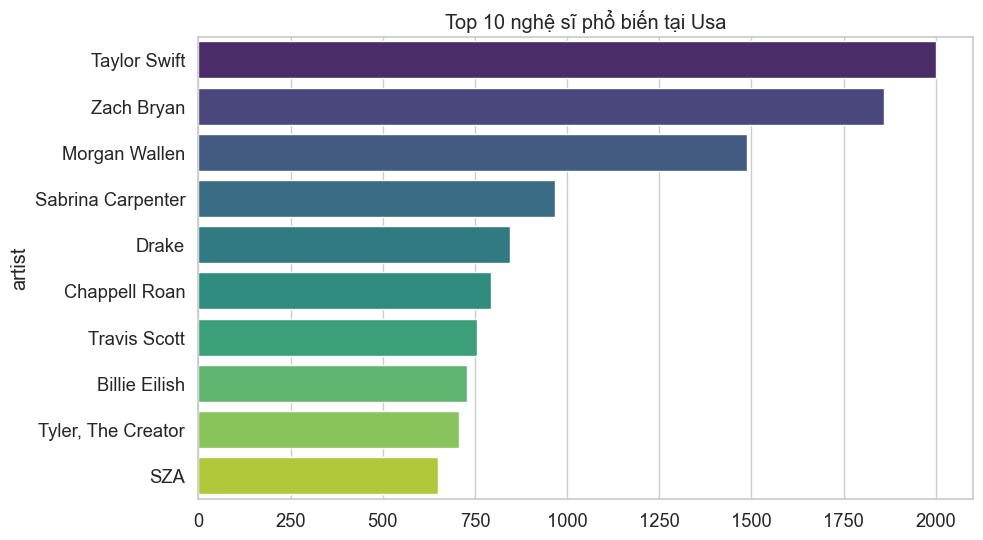

In [6]:
#top 10 nghệ sĩ xuất hiện nhiều nhất
top_artists = df['artist'].value_counts().head(10)
sns.barplot(y=top_artists.index, x=top_artists.values, palette="viridis")
plt.title("Top 10 nghệ sĩ phổ biến tại Usa")
plt.show()


C:\Users\nhutn\AppData\Local\Temp\ipykernel_5524\3672620135.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_genres, x='Count', y='Genre', palette="viridis")


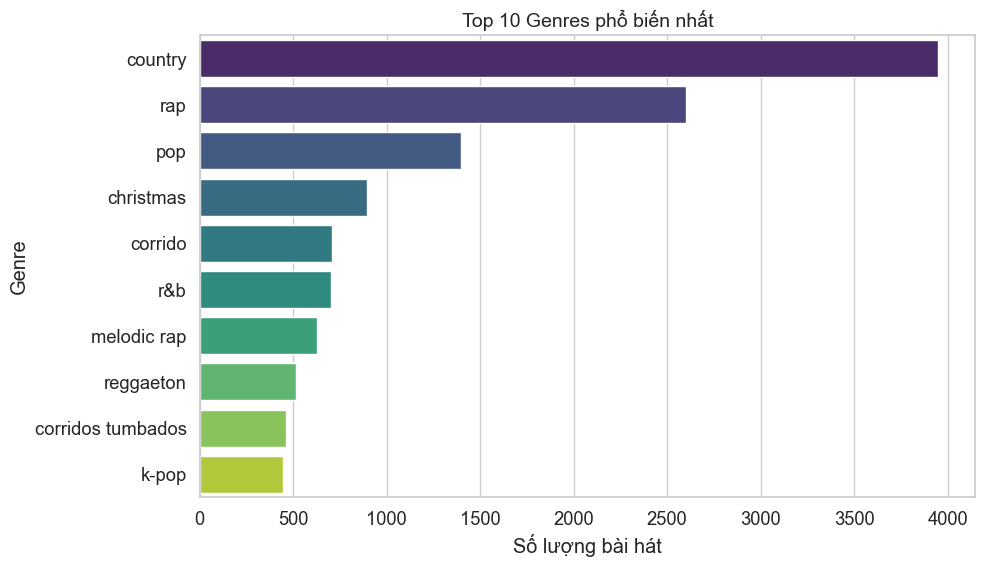

,Genre,Count
0,country,3948
1,rap,2599
2,pop,1395
3,christmas,892
4,corrido,709
5,r&b,700
6,melodic rap,626
7,reggaeton,514
8,corridos tumbados,462
9,k-pop,444


In [7]:
# Top 10 genres phổ biến nhất
# Bỏ giá trị unknown
df_genre = df[df['main_genre'] != "unknown"]

# Top 10 genres
top10_genres = (df_genre['main_genre']
                .value_counts()
                .head(10)
                .reset_index())
top10_genres.columns = ['Genre', 'Count']

plt.figure(figsize=(10,6))
sns.barplot(data=top10_genres, x='Count', y='Genre', palette="viridis")
plt.title("Top 10 Genres phổ biến nhất", fontsize=14)
plt.xlabel("Số lượng bài hát")
plt.ylabel("Genre")
plt.show()

top10_genres



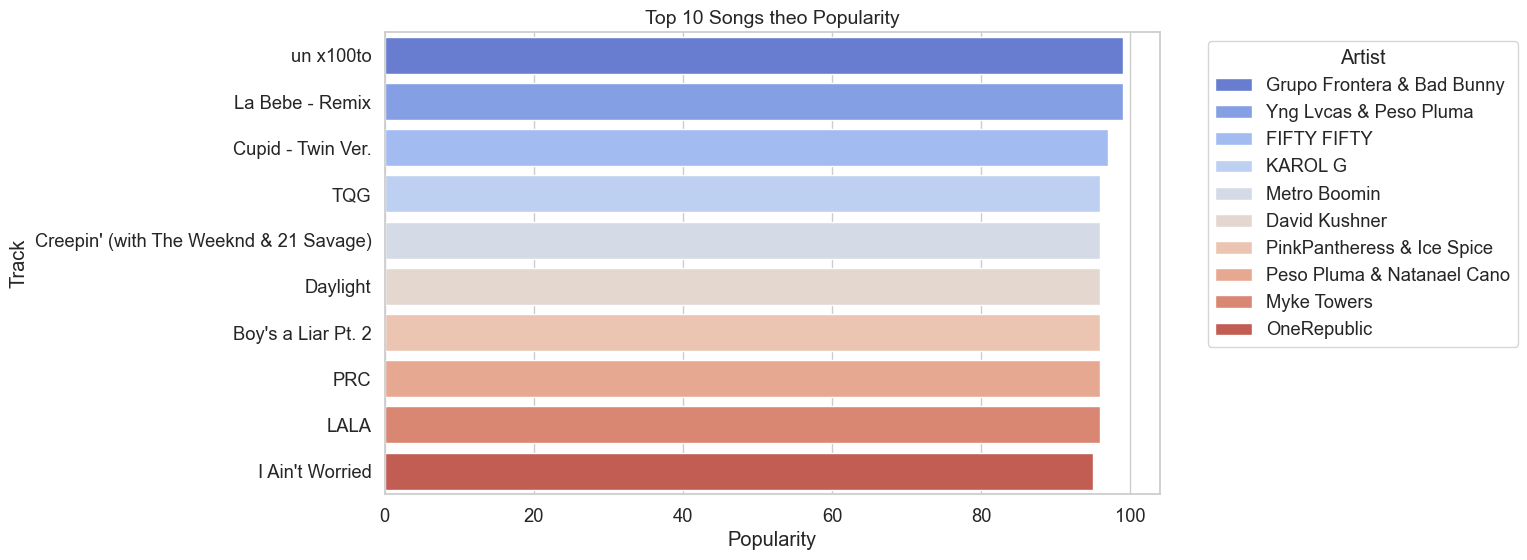

,track_id,song,artist,popularity
0,6pD0ufEQq0xdHSsRbg9LBK,un x100to,Grupo Frontera & Bad Bunny,99
1,2UW7JaomAMuX9pZrjVpHAU,La Bebe - Remix,Yng Lvcas & Peso Pluma,99
2,53DDMPqgMWNrEeE3NjThKE,Cupid - Twin Ver.,FIFTY FIFTY,97
3,0DWdj2oZMBFSzRsi2Cvfzf,TQG,KAROL G,96
4,2dHHgzDwk4BJdRwy9uXhTO,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,96
5,5OGZ2Mx4Cs6RCndDRycGBJ,Daylight,David Kushner,96
6,5CCr8msaN3MhgqBoa9yWhH,Boy's a Liar Pt. 2,PinkPantheress & Ice Spice,96
7,2mpoNBkngUEwnaKoBhZ0vl,PRC,Peso Pluma & Natanael Cano,96
8,7ABLbnD53cQK00mhcaOUVG,LALA,Myke Towers,96
9,4h9wh7iOZ0GGn8QVp4RAOB,I Ain't Worried,OneRepublic,95


In [8]:
# Top 10 bài hát theo Popularity (unique theo track_id)
if 'popularity' in df.columns:
    metric = 'popularity'
else:
    metric = 'streams'

top10_songs = (df[['track_id','song', 'artist', metric]]
               .drop_duplicates(subset=['track_id'])   # loại trùng theo track_id
               .sort_values(by=metric, ascending=False)
               .head(10)
               .reset_index(drop=True))

plt.figure(figsize=(10,6))
sns.barplot(data=top10_songs, x=metric, y='song', hue='artist',
            dodge=False, palette="coolwarm")
plt.title(f"Top 10 Songs theo {metric.capitalize()}", fontsize=14)
plt.xlabel(metric.capitalize())
plt.ylabel("Track")
plt.legend(title="Artist", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

top10_songs



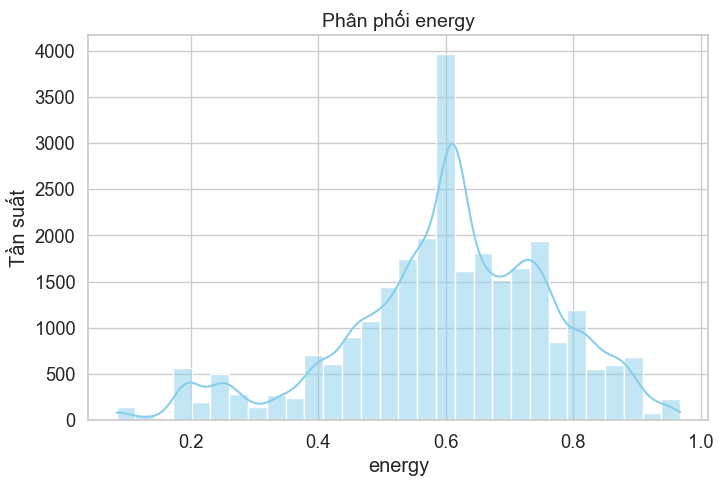

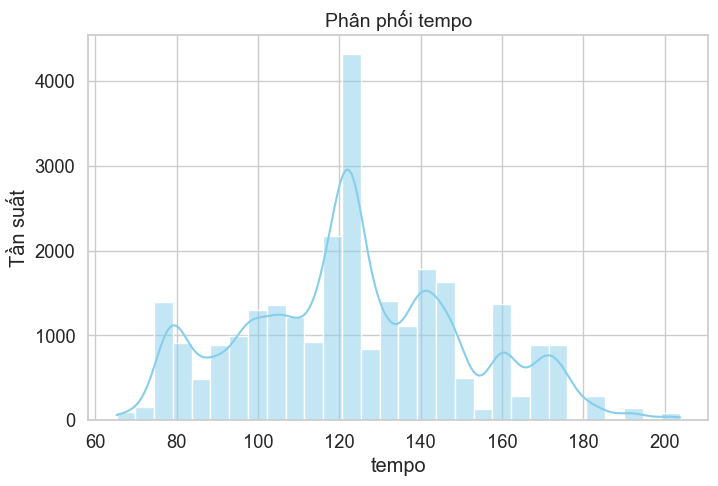

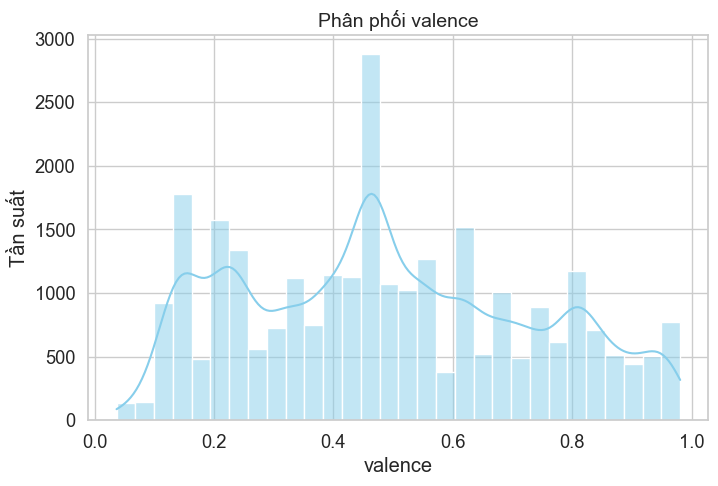

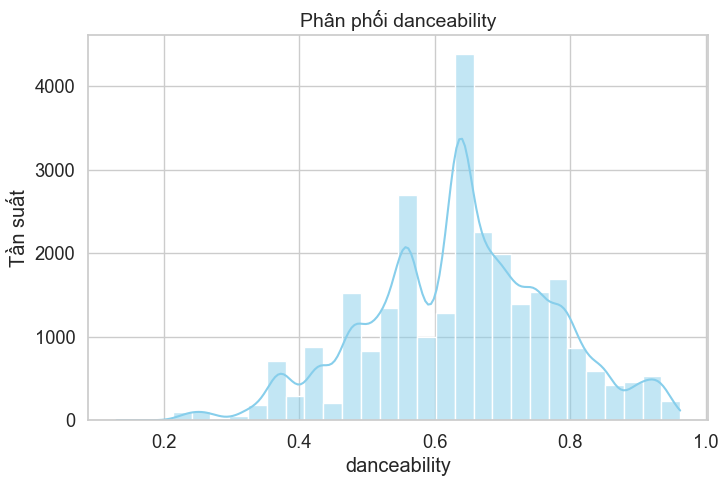

In [9]:
# Danh sách các đặc trưng muốn phân tích
features = ["energy", "tempo", "valence", "danceability"]

for f in features:
    plt.figure(figsize=(8,5))
    sns.histplot(df[f], kde=True, bins=30, color="skyblue")
    plt.title(f"Phân phối {f}", fontsize=14)
    plt.xlabel(f)
    plt.ylabel("Tần suất")
    plt.show()


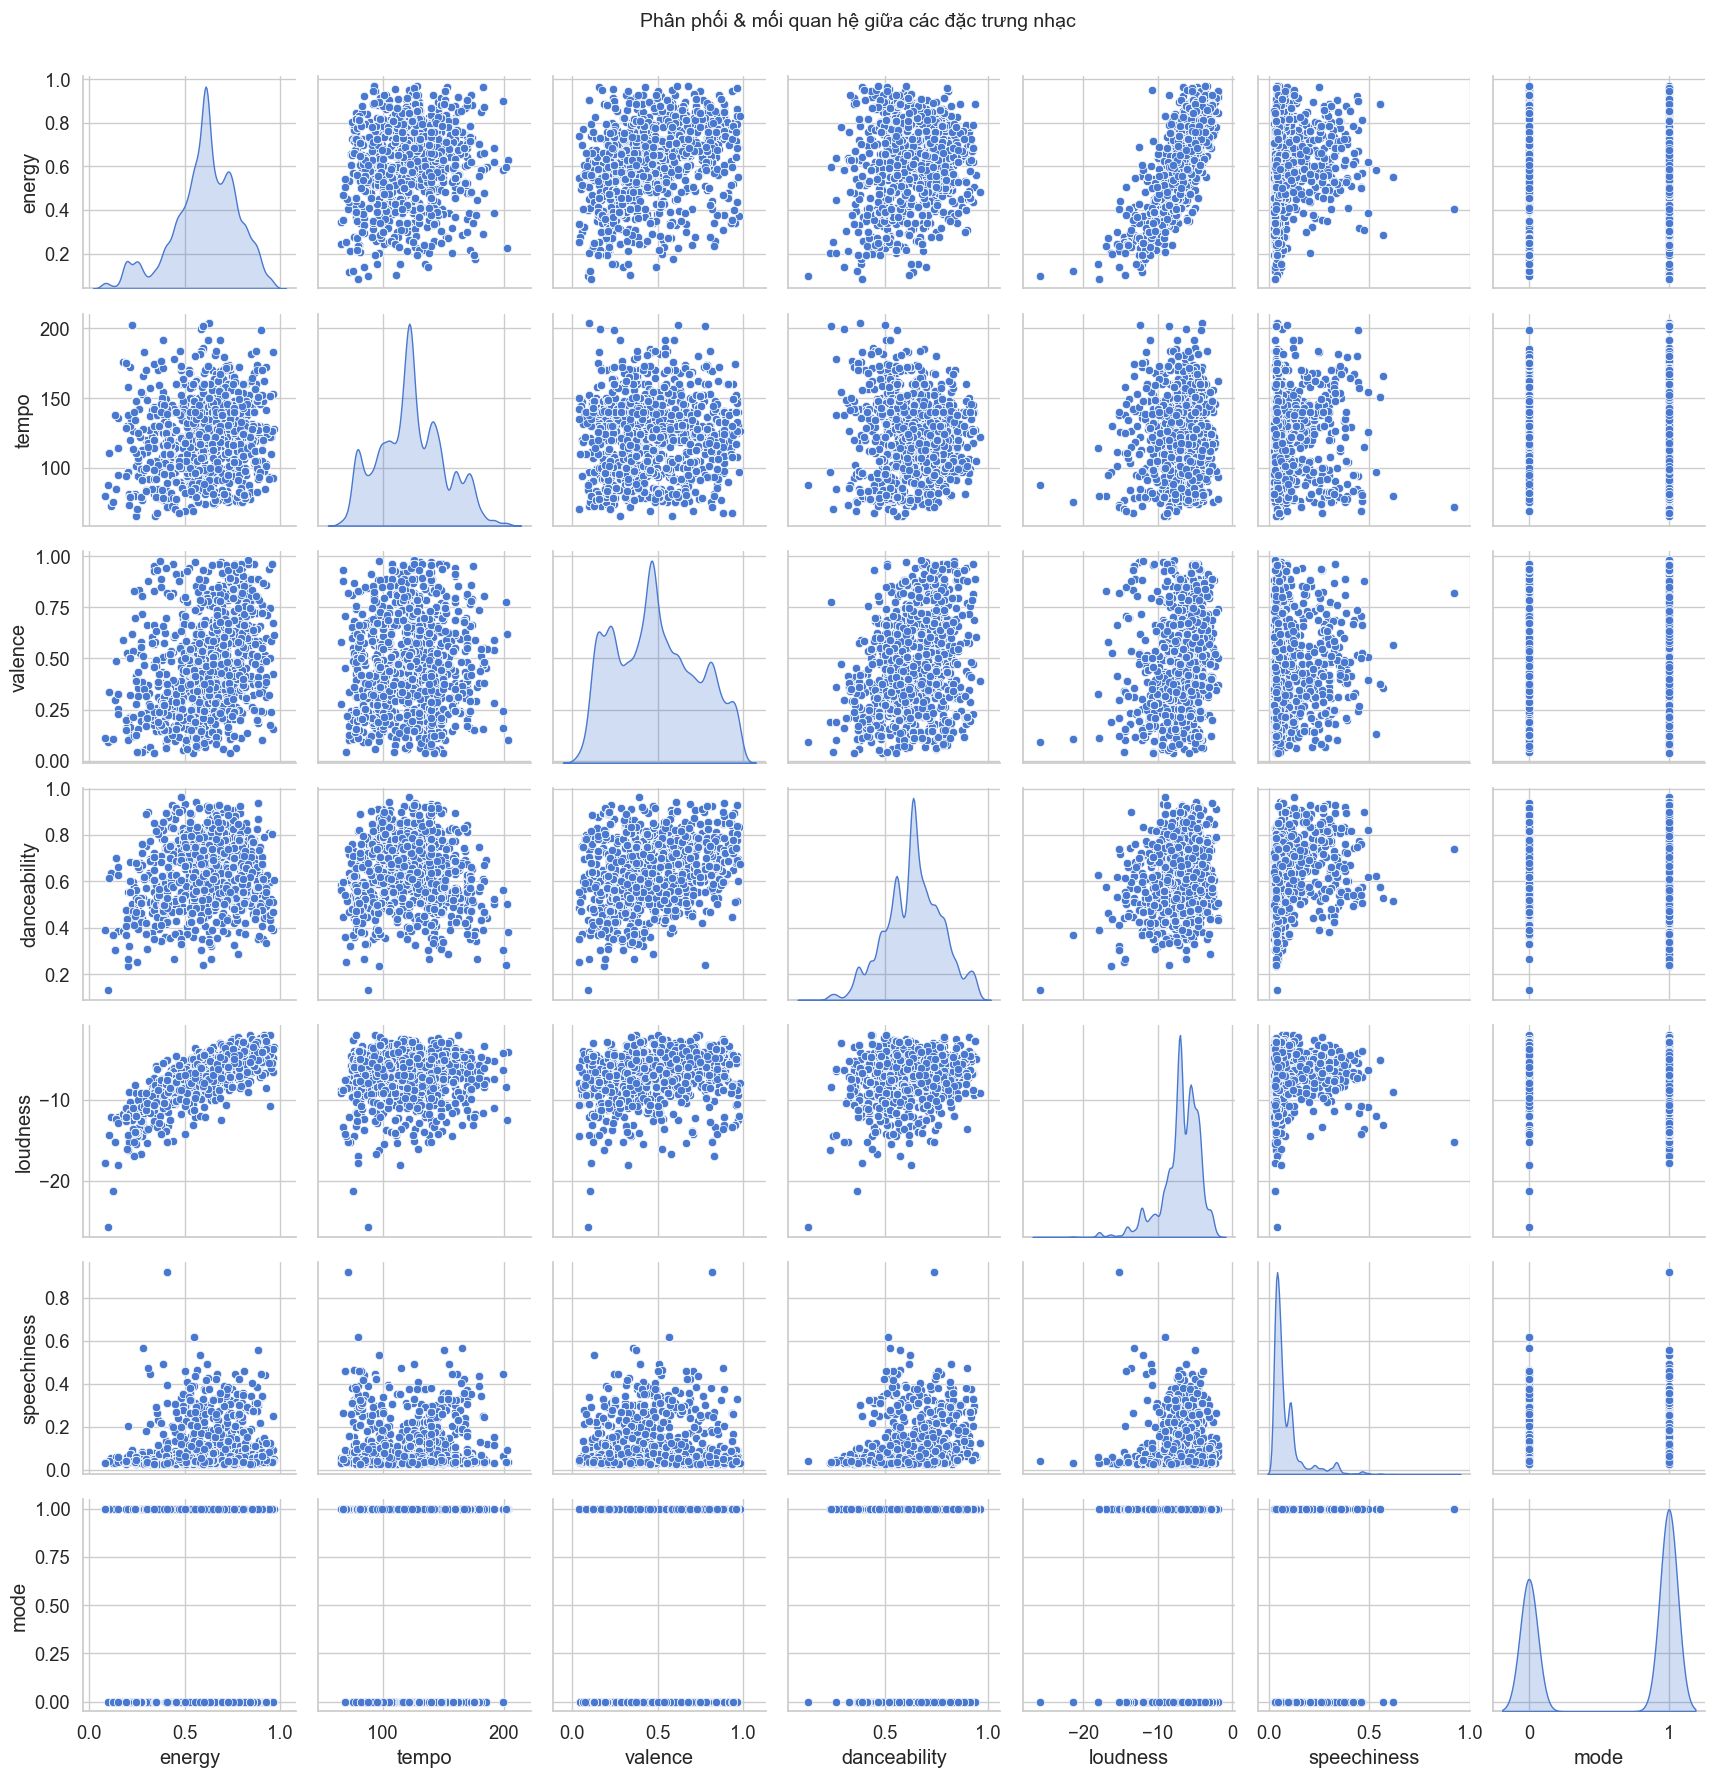

In [10]:
# Ma trận hiệp phương sai
sns.pairplot(df[["energy", "tempo", "valence", "danceability","loudness", "speechiness", "mode"]], diag_kind="kde")
plt.suptitle("Phân phối & mối quan hệ giữa các đặc trưng nhạc", y=1.02, fontsize=14)
plt.show()


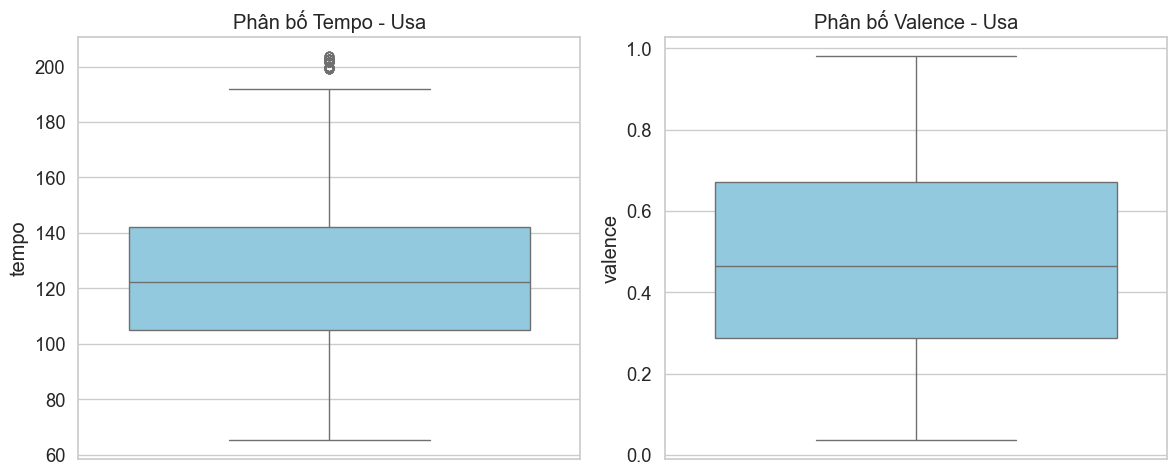

In [11]:
features = ["tempo", "valence"]

plt.figure(figsize=(12,5))
for i, col in enumerate(features, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Phân bố {col.capitalize()} - Usa")
plt.tight_layout()
plt.show()



In [12]:
!pip install scikit-learn


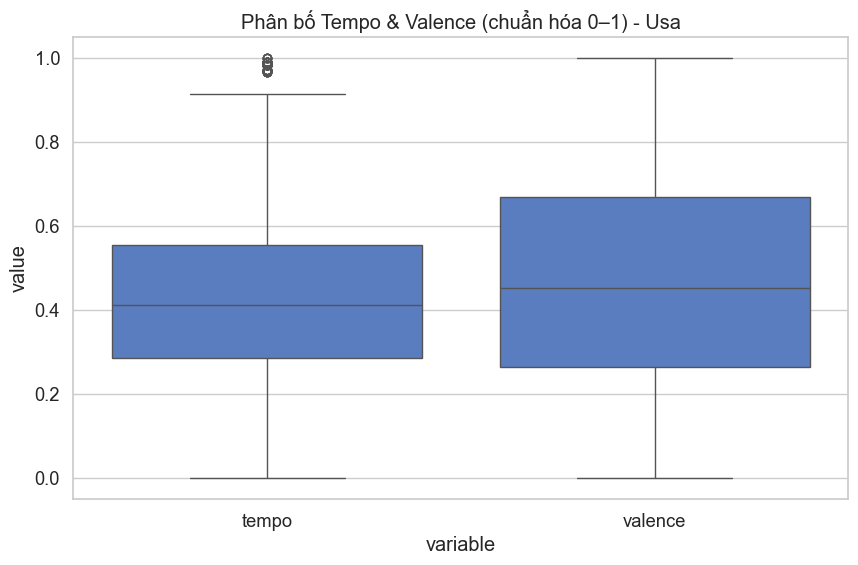

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[["tempo", "valence"]])
scaled_df = pd.DataFrame(scaled, columns=["tempo", "valence"])

sns.boxplot(x="variable", y="value", data=pd.melt(scaled_df))
plt.title("Phân bố Tempo & Valence (chuẩn hóa 0–1) - Usa")
plt.show()


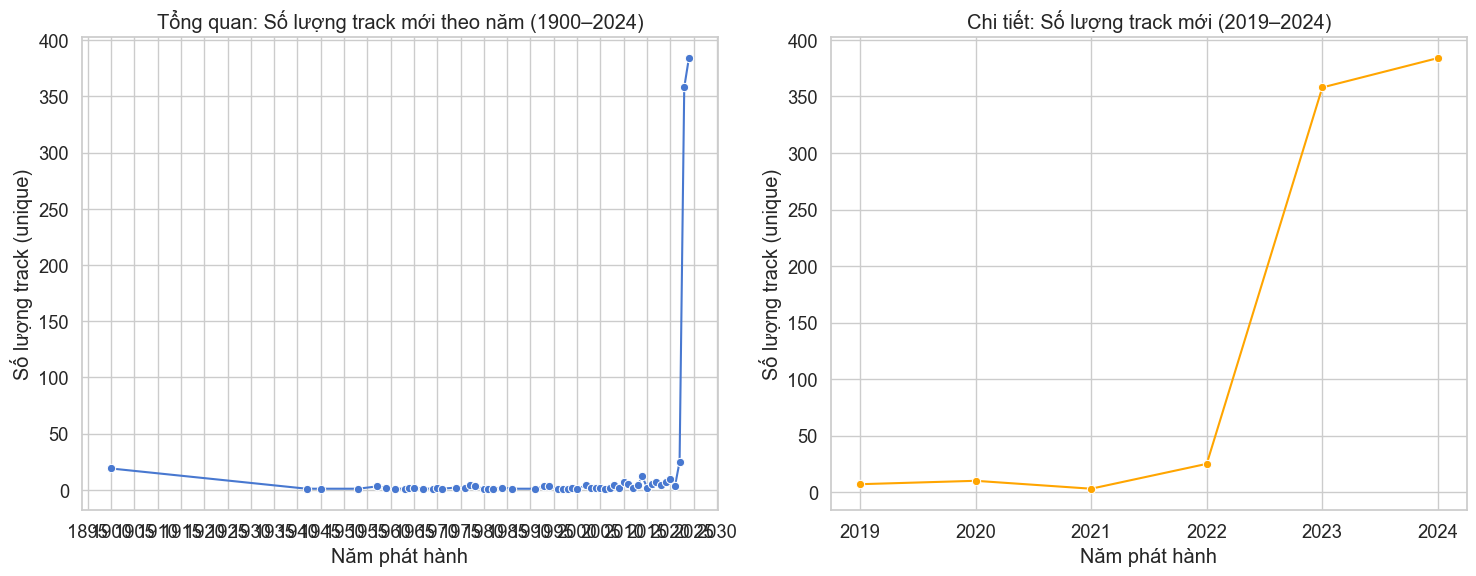

In [14]:
# import matplotlib.ticker as mticker

# # --- Toàn bộ dữ liệu ---
# plt.figure(figsize=(15,6))

# # Subplot 1: Toàn bộ từ 1960
# plt.subplot(1,2,1)
# sns.lineplot(x=tracks_per_year.index, y=tracks_per_year.values, marker="o")
# plt.title("Tổng quan: Số lượng track mới theo năm (1960–2025)")
# plt.xlabel("Năm phát hành")
# plt.ylabel("Số lượng track (unique)")
# plt.grid(True)

# # Để tránh quá dày, hiển thị tick mỗi 5 năm
# plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))

# # Subplot 2: Chi tiết từ 2020
# tracks_recent = tracks_per_year[tracks_per_year.index >= 2020]

# plt.subplot(1,2,2)
# sns.lineplot(x=tracks_recent.index, y=tracks_recent.values, marker="o", color="orange")
# plt.title("Chi tiết: Số lượng track mới (2020–2025)")
# plt.xlabel("Năm phát hành")
# plt.ylabel("Số lượng track (unique)")
# plt.grid(True)

# # Hiển thị tất cả năm trong giai đoạn 2020–2025
# plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))

# plt.tight_layout()
# plt.show()
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# ============================
# 1. Chuẩn bị dữ liệu
# ============================

# Đảm bảo release_date là datetime
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")

# Lấy năm phát hành
df["release_year"] = df["release_date"].dt.year

# Đếm số track unique theo năm
tracks_per_year = df.groupby("release_year")["track_id"].nunique()

# ============================
# 2. Vẽ biểu đồ


plt.figure(figsize=(15,6))

# Subplot 1: toàn bộ range
plt.subplot(1,2,1)
sns.lineplot(x=tracks_per_year.index, y=tracks_per_year.values, marker="o")
plt.title(f"Tổng quan: Số lượng track mới theo năm ({tracks_per_year.index.min()}–{tracks_per_year.index.max()})")
plt.xlabel("Năm phát hành")
plt.ylabel("Số lượng track (unique)")
plt.grid(True)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))

# Subplot 2: zoom vào 5 năm gần nhất
recent_years = tracks_per_year.index.max() - 5
tracks_recent = tracks_per_year[tracks_per_year.index >= recent_years]

plt.subplot(1,2,2)
sns.lineplot(x=tracks_recent.index, y=tracks_recent.values, marker="o", color="orange")
plt.title(f"Chi tiết: Số lượng track mới ({recent_years}–{tracks_per_year.index.max()})")
plt.xlabel("Năm phát hành")
plt.ylabel("Số lượng track (unique)")
plt.grid(True)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))

plt.tight_layout()
plt.show()


Tổng cộng dataset có 556 tuần BXH


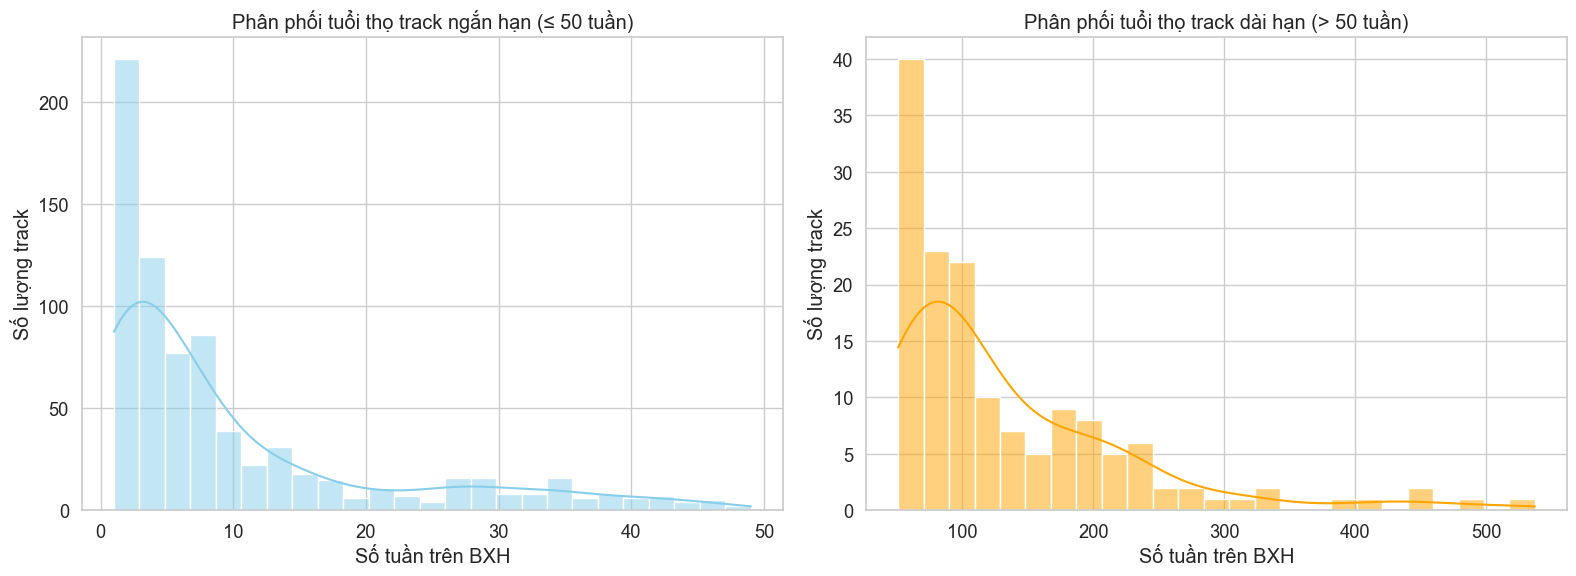

In [15]:

# Đổi date sang datetime
df['date'] = pd.to_datetime(df['date'], errors="coerce")

# Tính số tuần mỗi track có mặt trên BXH
track_lifetime = df.groupby('track_id')['date'].nunique().reset_index()
track_lifetime.columns = ['track_id','weeks_on_chart']

# Tổng số tuần trong dataset
total_weeks = df['date'].nunique()
print(f"Tổng cộng dataset có {total_weeks} tuần BXH")

# Vẽ histogram short vs long term
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Track ngắn hạn (≤ 50 tuần)
sns.histplot(track_lifetime[track_lifetime['weeks_on_chart'] <= 50]['weeks_on_chart'], 
             bins=25, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Phân phối tuổi thọ track ngắn hạn (≤ 50 tuần)")
axes[0].set_xlabel("Số tuần trên BXH")
axes[0].set_ylabel("Số lượng track")

# Track dài hạn (> 50 tuần)
sns.histplot(track_lifetime[track_lifetime['weeks_on_chart'] > 50]['weeks_on_chart'], 
             bins=25, kde=True, ax=axes[1], color="orange")
axes[1].set_title("Phân phối tuổi thọ track dài hạn (> 50 tuần)")
axes[1].set_xlabel("Số tuần trên BXH")
axes[1].set_ylabel("Số lượng track")

plt.tight_layout()
plt.show()




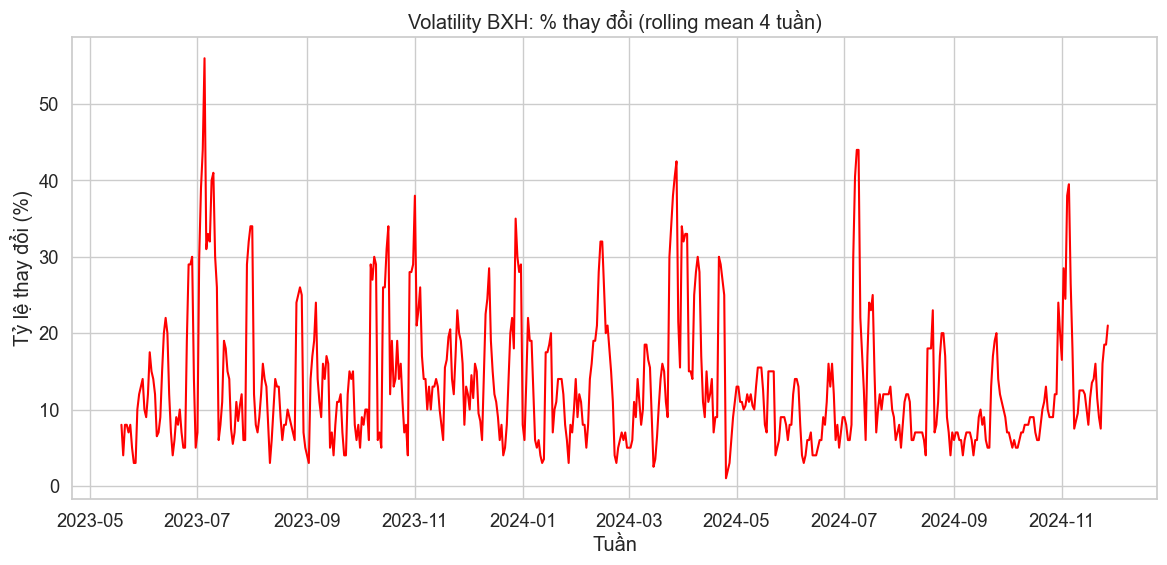

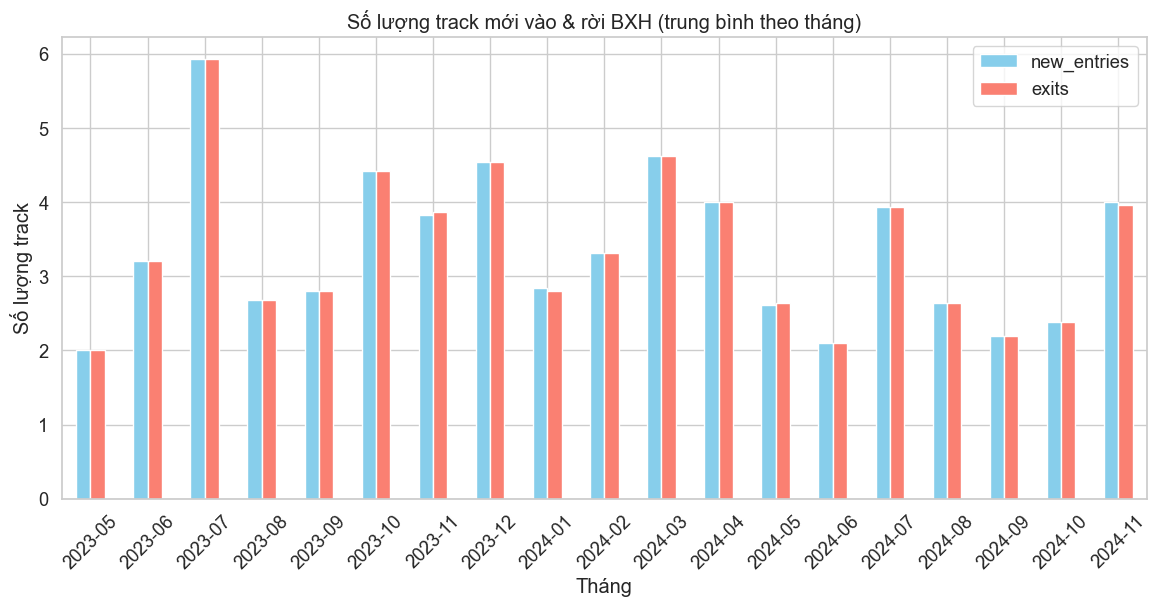

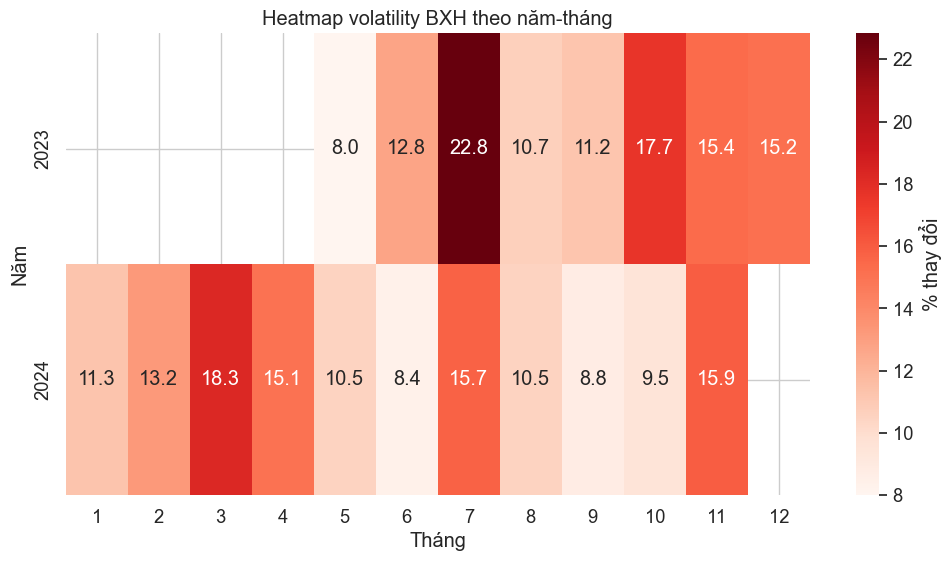

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chuẩn bị dữ liệu
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.sort_values(['date','position'])

weeks = sorted(df['date'].unique())
volatility_data = []

for i in range(1, len(weeks)):
    this_week = df[df['date'] == weeks[i]]['track_id'].unique()
    prev_week = df[df['date'] == weeks[i-1]]['track_id'].unique()
    
    new_entries = len(set(this_week) - set(prev_week))
    exits = len(set(prev_week) - set(this_week))
    volatility = (new_entries + exits) / 50 * 100
    
    volatility_data.append({
        'week': weeks[i],
        'new_entries': new_entries,
        'exits': exits,
        'volatility_pct': volatility
    })

vol_df = pd.DataFrame(volatility_data)

# Giới hạn volatility tối đa 100% để tránh outlier
vol_df['volatility_pct'] = vol_df['volatility_pct'].clip(upper=100)

# Rolling mean (4 tuần)
vol_df['volatility_roll'] = vol_df['volatility_pct'].rolling(window=4, min_periods=1).mean()

# ======================
# 1. Line chart volatility smoothed
# ======================
plt.figure(figsize=(14,6))
sns.lineplot(data=vol_df, x='week', y='volatility_roll', color="red")
plt.title("Volatility BXH: % thay đổi (rolling mean 4 tuần)")
plt.ylabel("Tỷ lệ thay đổi (%)")
plt.xlabel("Tuần")
plt.grid(True)
plt.show()

# ======================
# 2. Bar chart trung bình theo tháng
# ======================
vol_df['month'] = vol_df['week'].dt.to_period("M")
monthly_vol = vol_df.groupby('month')[['new_entries','exits']].mean()

monthly_vol.plot(kind='bar', figsize=(14,6), color=["skyblue","salmon"])
plt.title("Số lượng track mới vào & rời BXH (trung bình theo tháng)")
plt.ylabel("Số lượng track")
plt.xlabel("Tháng")
plt.xticks(rotation=45)
plt.show()

# ======================
# 3. Heatmap volatility theo năm-tháng
# ======================
vol_df['year'] = vol_df['week'].dt.year
vol_df['month_num'] = vol_df['week'].dt.month

heatmap_data = vol_df.groupby(['year','month_num'])['volatility_pct'].mean().unstack()

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="Reds", cbar_kws={'label': '% thay đổi'})
plt.title("Heatmap volatility BXH theo năm-tháng")
plt.ylabel("Năm")
plt.xlabel("Tháng")
plt.show()



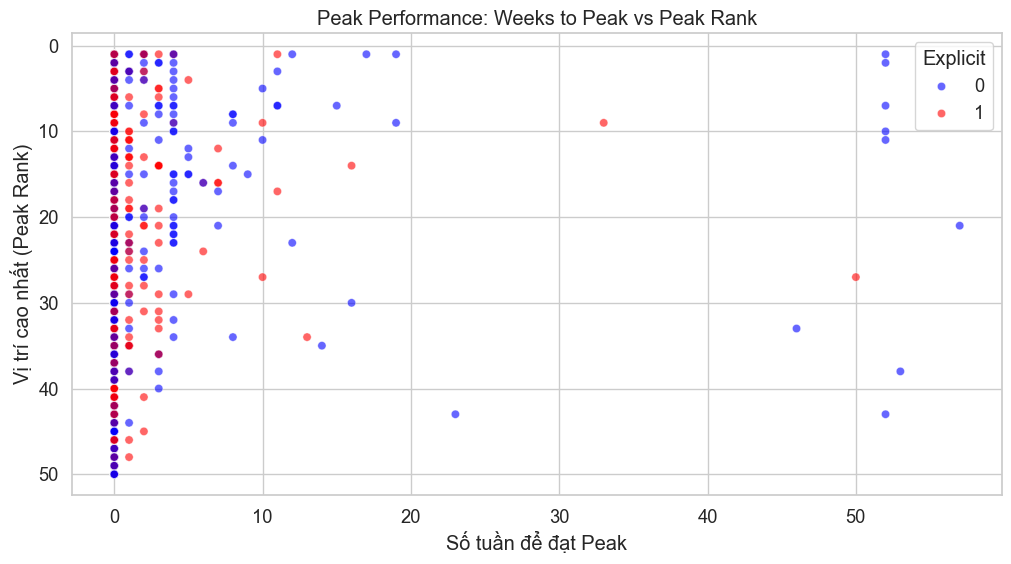

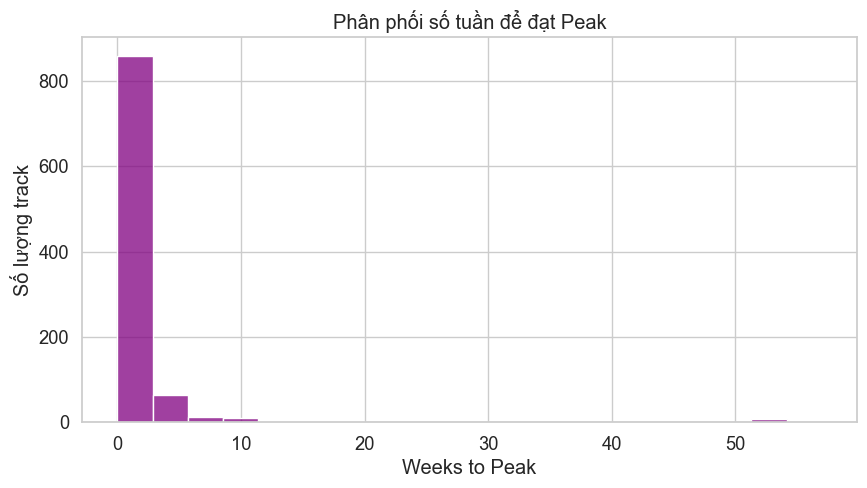

In [17]:
# Peak performance per track
track_perf = df.groupby('track_id').agg(
    week_first=('date','min'),
    week_peak=('date', lambda x: df.loc[x.index, 'position'].idxmin())
).reset_index()

# Lấy peak rank
peak_rank = df.groupby('track_id')['position'].min().reset_index()
peak_rank.columns = ['track_id','peak_rank']

# Merge vào
track_perf = track_perf.merge(peak_rank, on='track_id')

# Tính số tuần để đạt peak
track_perf['week_first'] = pd.to_datetime(track_perf['week_first'])
track_perf['week_peak'] = df.loc[track_perf['week_peak'],'date'].values
track_perf['week_peak'] = pd.to_datetime(track_perf['week_peak'])
track_perf['weeks_to_peak'] = ((track_perf['week_peak'] - track_perf['week_first']).dt.days / 7).astype(int)

# Merge thêm tên bài và explicit
meta = df[['track_id','song','artist','is_explicit']].drop_duplicates()
track_perf = track_perf.merge(meta, on='track_id', how='left')

# --- Visualization ---
plt.figure(figsize=(12,6))
sns.scatterplot(data=track_perf, x='weeks_to_peak', y='peak_rank',
                hue='is_explicit', palette={0:"blue",1:"red"}, alpha=0.6)

plt.gca().invert_yaxis()  # rank 1 ở trên
plt.title("Peak Performance: Weeks to Peak vs Peak Rank")
plt.xlabel("Số tuần để đạt Peak")
plt.ylabel("Vị trí cao nhất (Peak Rank)")
plt.legend(title="Explicit")
plt.grid(True)
plt.show()

# Histogram phân phối weeks_to_peak
plt.figure(figsize=(10,5))
sns.histplot(track_perf['weeks_to_peak'], bins=20, kde=False, color="purple")
plt.title("Phân phối số tuần để đạt Peak")
plt.xlabel("Weeks to Peak")
plt.ylabel("Số lượng track")
plt.show()


Top 5 track trụ lâu nhất trên BXH:
                 track_id                                           song  \
0  3WMj8moIAXJhHsyLaqIIHI                        Something in the Orange   
1  583dMdiUquLMenarTp7PQm                                     Last Night   
2  4KULAymBBJcPRpk1yO4dOG  I Remember Everything (feat. Kacey Musgraves)   
3  7KA4W4McWYRpgf0fWsJZWB               See You Again (feat. Kali Uchis)   
4  0mflMxspEfB0VbI1kyLiAv                                   Stick Season   

               artist main_genre  weeks_on_chart release_date  
0          Zach Bryan    country             537   2022-04-22  
1       Morgan Wallen    country             493   2023-03-03  
2          Zach Bryan    country             447   2023-08-25  
3  Tyler, The Creator    unknown             444   2017-07-21  
4          Noah Kahan    unknown             415   2022-10-14  


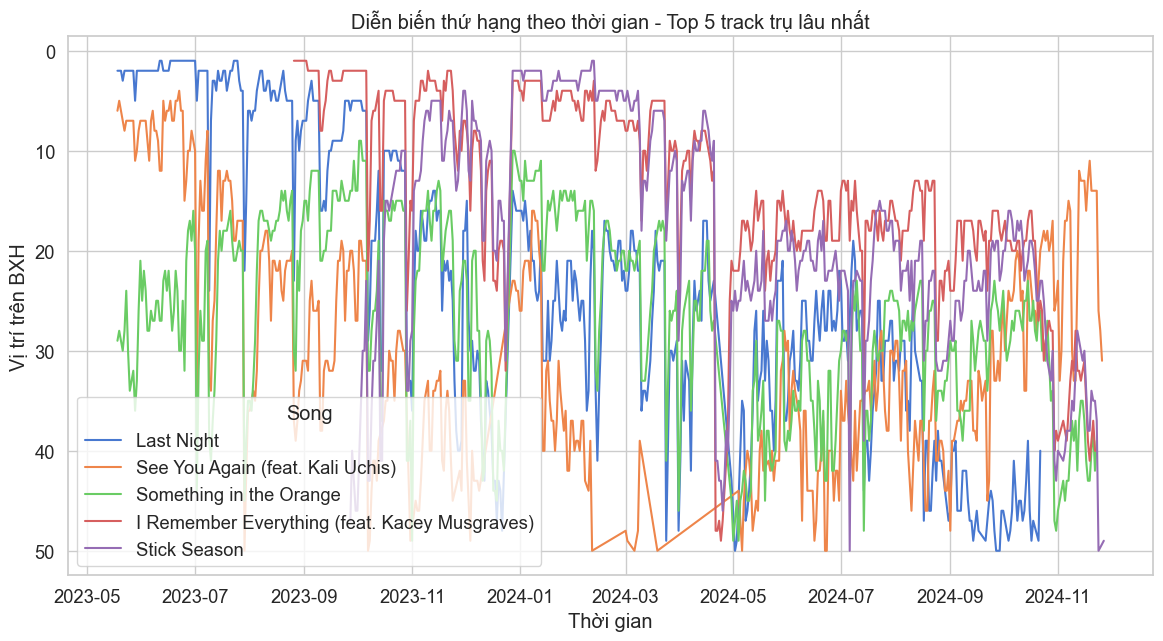

In [18]:
# Số tuần mỗi track tồn tại
track_lifetime = df.groupby('track_id')['date'].nunique().reset_index()
track_lifetime.columns = ['track_id', 'weeks_on_chart']

# Merge lại để lấy thêm thông tin bài hát
df_top5 = track_lifetime.sort_values(by='weeks_on_chart', ascending=False).head(5)
df_top5 = df_top5.merge(df[['track_id','song','artist','main_genre', 'release_date']].drop_duplicates(),
                        on='track_id', how='left')

print("Top 5 track trụ lâu nhất trên BXH:")
print(df_top5[['track_id','song','artist','main_genre','weeks_on_chart', 'release_date']])

plt.figure(figsize=(14,7))

# Lọc dữ liệu chỉ gồm top 5
df_top5_tracks = df[df['track_id'].isin(df_top5['track_id'])]

# Vẽ line chart
sns.lineplot(data=df_top5_tracks, x='date', y='position', hue='song')

# Đảo ngược trục Y vì hạng 1 là top
plt.gca().invert_yaxis()

plt.title("Diễn biến thứ hạng theo thời gian - Top 5 track trụ lâu nhất")
plt.xlabel("Thời gian")
plt.ylabel("Vị trí trên BXH")
plt.legend(title="Song")
plt.show()


C:\Users\nhutn\AppData\Local\Temp\ipykernel_5524\3135989211.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_tracks, x='n_tracks', y='artist', palette="Blues_r")


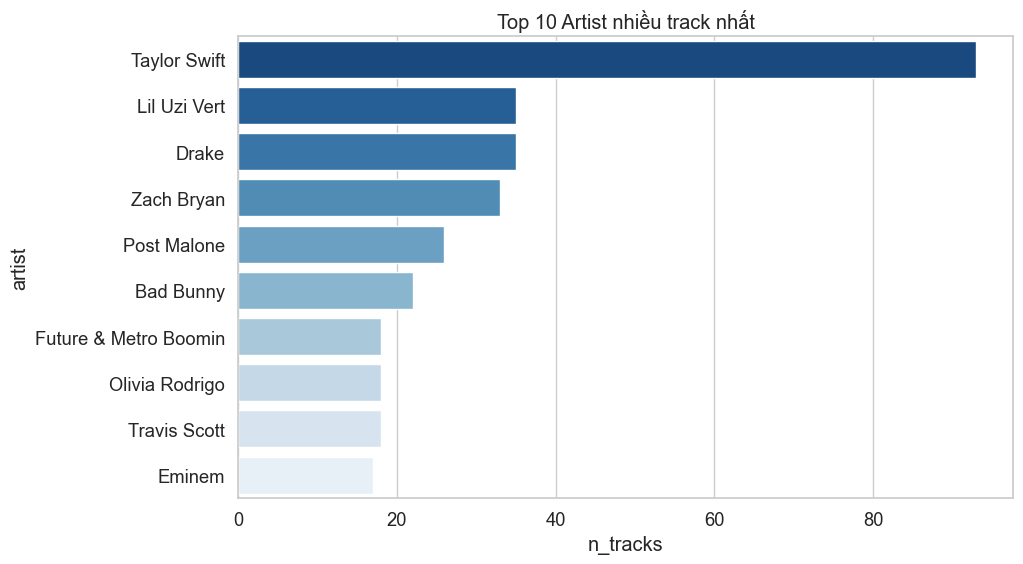

C:\Users\nhutn\AppData\Local\Temp\ipykernel_5524\3135989211.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_weeks, x='total_weeks', y='artist', palette="Greens_r")


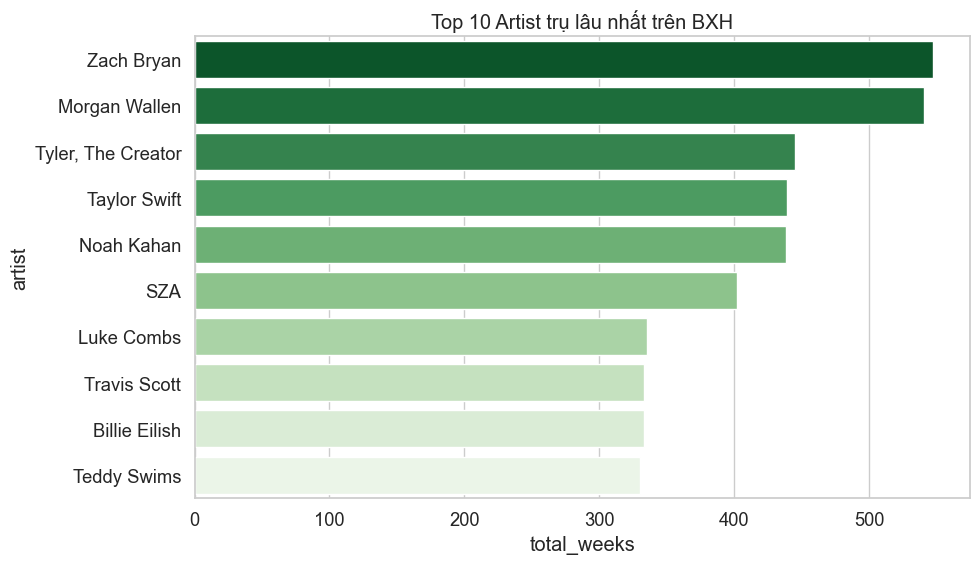

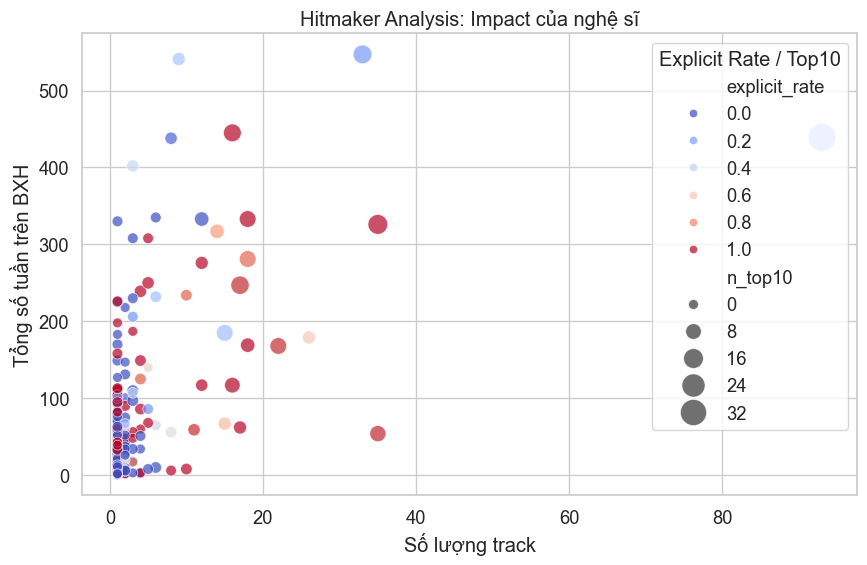

In [19]:
# Chuẩn hóa tên nghệ sĩ (nếu collab nhiều, có thể tách ra nhưng ở đây để nguyên)
artist_stats = df.groupby('artist').agg(
    n_tracks=('track_id','nunique'),
    total_weeks=('date','nunique'),
    best_rank=('position','min'),
    avg_rank=('position','mean'),
    explicit_rate=('is_explicit','mean')
).reset_index()

# Thêm số track vào top10
artist_top10 = df[df['position']<=10].groupby('artist')['track_id'].nunique().reset_index()
artist_top10.columns = ['artist','n_top10']
artist_stats = artist_stats.merge(artist_top10, on='artist', how='left').fillna(0)

# Bar chart top 10 artist nhiều track
top_tracks = artist_stats.sort_values('n_tracks', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_tracks, x='n_tracks', y='artist', palette="Blues_r")
plt.title("Top 10 Artist nhiều track nhất")
plt.show()

# Bar chart top 10 artist trụ lâu nhất
top_weeks = artist_stats.sort_values('total_weeks', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_weeks, x='total_weeks', y='artist', palette="Greens_r")
plt.title("Top 10 Artist trụ lâu nhất trên BXH")
plt.show()

# Bubble chart: n_tracks vs total_weeks
plt.figure(figsize=(10,6))
sns.scatterplot(data=artist_stats, 
                x='n_tracks', y='total_weeks', 
                size='n_top10', sizes=(50,400), 
                hue='explicit_rate', palette="coolwarm", alpha=0.7)
plt.title("Hitmaker Analysis: Impact của nghệ sĩ")
plt.xlabel("Số lượng track")
plt.ylabel("Tổng số tuần trên BXH")
plt.legend(title="Explicit Rate / Top10")
plt.show()


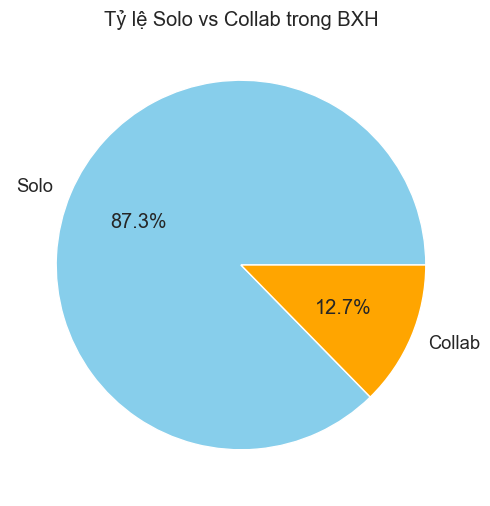

C:\Users\nhutn\AppData\Local\Temp\ipykernel_5524\3440137398.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=track_stats, x='is_collab', y='weeks_on_chart', palette="Set2")


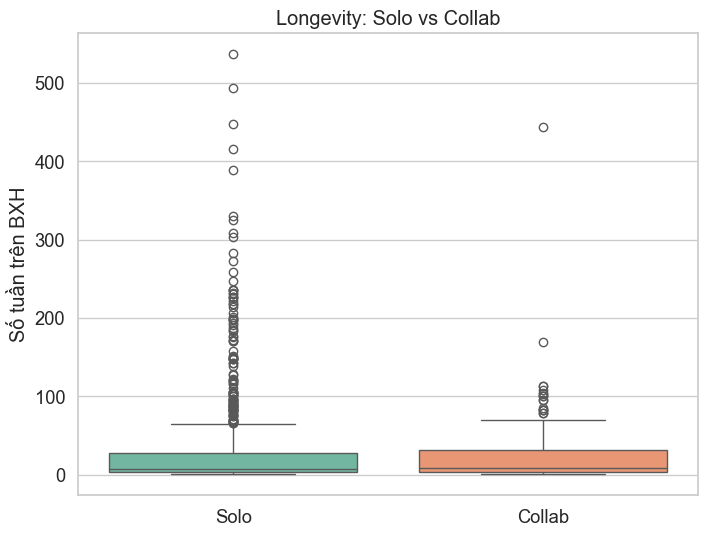

C:\Users\nhutn\AppData\Local\Temp\ipykernel_5524\3440137398.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=track_stats, x='is_collab', y='peak_rank', palette="Set3")


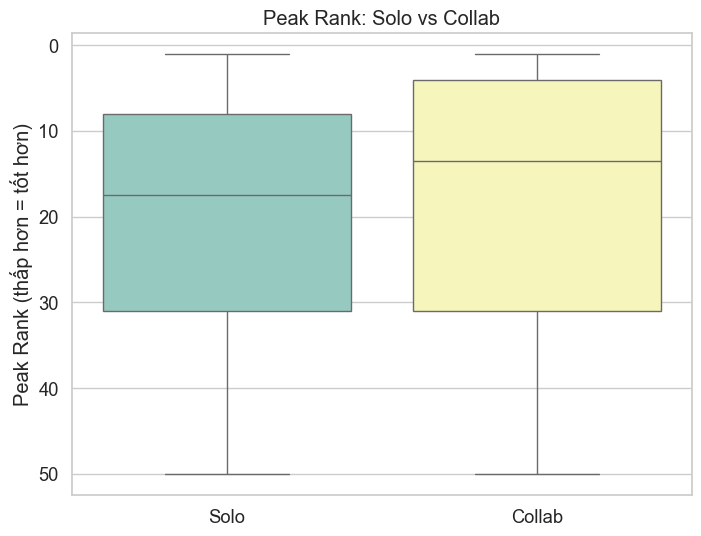

Tuổi thọ trung bình (weeks):
is_collab
0    30.913043
1    25.983146
Name: weeks_on_chart, dtype: float64

Hạng cao nhất trung bình:
is_collab
0    19.885266
1    18.376404
Name: peak_rank, dtype: float64


In [20]:
# 1. Tạo cột is_collab
def detect_collab(artist):
    artist = str(artist).lower()
    if ("feat" in artist) or ("&" in artist) or ("," in artist):
        return 1
    return 0

df['is_collab'] = df['artist'].apply(detect_collab)

# 2. Longevity mỗi track
track_stats = df.groupby(['track_id','is_collab']).agg(
    weeks_on_chart=('date','nunique'),
    peak_rank=('position','min')
).reset_index()

# Merge thêm tên bài + explicit
meta = df[['track_id','song','artist','is_explicit']].drop_duplicates()
track_stats = track_stats.merge(meta, on='track_id', how='left')

# ======================
# Pie chart tỷ lệ collab vs solo
# ======================
collab_counts = df['is_collab'].value_counts(normalize=True) * 100
plt.figure(figsize=(6,6))
plt.pie(collab_counts, labels=['Solo','Collab'], autopct='%1.1f%%', colors=["skyblue","orange"])
plt.title("Tỷ lệ Solo vs Collab trong BXH")
plt.show()

# ======================
# Boxplot longevity
# ======================
plt.figure(figsize=(8,6))
sns.boxplot(data=track_stats, x='is_collab', y='weeks_on_chart', palette="Set2")
plt.xticks([0,1], ['Solo','Collab'])
plt.title("Longevity: Solo vs Collab")
plt.xlabel("")
plt.ylabel("Số tuần trên BXH")
plt.show()

# ======================
# Boxplot peak rank
# ======================
plt.figure(figsize=(8,6))
sns.boxplot(data=track_stats, x='is_collab', y='peak_rank', palette="Set3")
plt.xticks([0,1], ['Solo','Collab'])
plt.gca().invert_yaxis()  # vì rank 1 là top nhất
plt.title("Peak Rank: Solo vs Collab")
plt.xlabel("")
plt.ylabel("Peak Rank (thấp hơn = tốt hơn)")
plt.show()

# ======================
# Tính trung bình
# ======================
print("Tuổi thọ trung bình (weeks):")
print(track_stats.groupby('is_collab')['weeks_on_chart'].mean())

print("\nHạng cao nhất trung bình:")
print(track_stats.groupby('is_collab')['peak_rank'].mean())


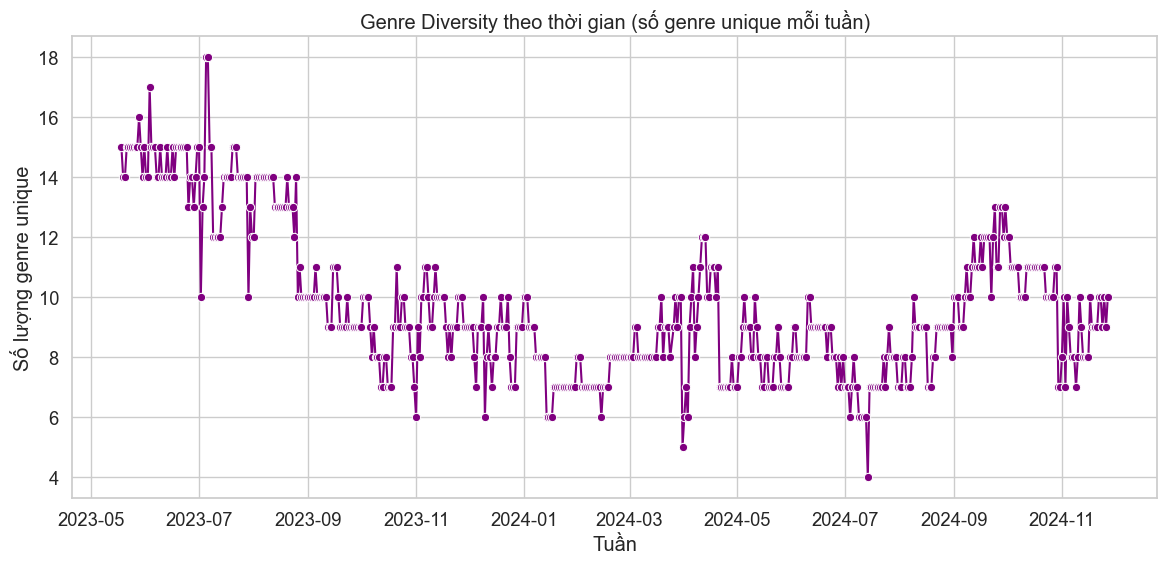

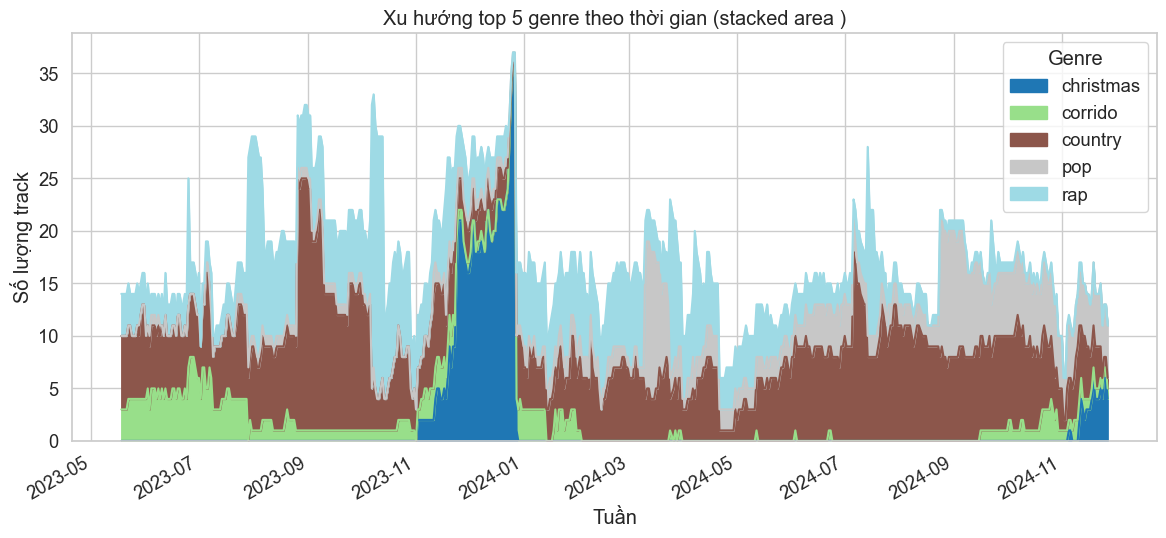

In [21]:
# # 1. Genre diversity (số genre unique mỗi tuần)
# genre_diversity = df.groupby('date')['main_genre'].nunique().reset_index()
# genre_diversity.columns = ['date','n_genres']

# plt.figure(figsize=(14,6))
# sns.lineplot(data=genre_diversity, x='date', y='n_genres', marker="o", color="purple")
# plt.title("Genre Diversity theo thời gian (số genre unique mỗi tuần)")
# plt.xlabel("Tuần")
# plt.ylabel("Số lượng genre unique")
# plt.grid(True)
# plt.show()

# # 2. Stacked area chart cho top genre
# # Lấy top 5 genre phổ biến nhất toàn bộ BXH
# top_genres = df['main_genre'].value_counts().head(5).index
# df_top_genres = df[df['main_genre'].isin(top_genres)]

# genre_trend = df_top_genres.groupby(['date','main_genre'])['track_id'].nunique().unstack().fillna(0)

# genre_trend.plot(kind='area', stacked=True, figsize=(14,6), cmap="tab20")
# plt.title("Xu hướng top 5 genre theo thời gian (stacked area)")
# plt.xlabel("Tuần")
# plt.ylabel("Số lượng track")
# plt.legend(title="Genre")
# plt.show()
# Bỏ genre "unknown"
df = df[df['main_genre'] != "unknown"]

# 1. Genre diversity (số genre unique mỗi tuần)
genre_diversity = df.groupby('date')['main_genre'].nunique().reset_index()
genre_diversity.columns = ['date','n_genres']

plt.figure(figsize=(14,6))
sns.lineplot(data=genre_diversity, x='date', y='n_genres', marker="o", color="purple")
plt.title("Genre Diversity theo thời gian (số genre unique mỗi tuần)")
plt.xlabel("Tuần")
plt.ylabel("Số lượng genre unique")
plt.grid(True)
plt.show()

# 2. Stacked area chart cho top genre
# Lấy top 5 genre phổ biến nhất toàn bộ BXH (không có unknown nữa)
top_genres = df['main_genre'].value_counts().head(5).index
df_top_genres = df[df['main_genre'].isin(top_genres)]

genre_trend = df_top_genres.groupby(['date','main_genre'])['track_id'].nunique().unstack().fillna(0)

genre_trend.plot(kind='area', stacked=True, figsize=(14,6), cmap="tab20")
plt.title("Xu hướng top 5 genre theo thời gian (stacked area )")
plt.xlabel("Tuần")
plt.ylabel("Số lượng track")
plt.legend(title="Genre")
plt.show()


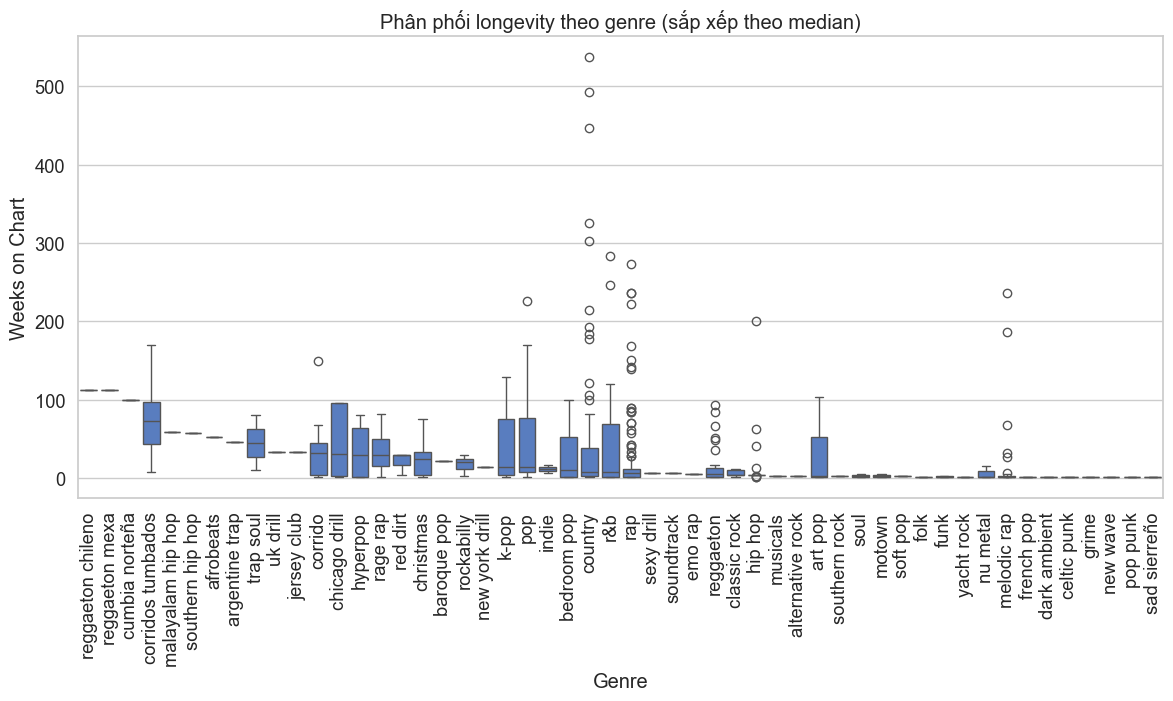

In [22]:
# Tính số tuần mỗi track xuất hiện
track_lifetime = df.groupby('track_id')['date'].nunique().reset_index()
track_lifetime.columns = ['track_id','weeks_on_chart']

# Lấy thông tin genre
track_genre = df[['track_id','song','artist','main_genre']].drop_duplicates()

# Merge vào để có bảng longevity
df_longevity = track_lifetime.merge(track_genre, on='track_id', how='left')

# Tính median longevity theo genre để sắp xếp
order = df_longevity.groupby("main_genre")["weeks_on_chart"].median().sort_values(ascending=False).index

plt.figure(figsize=(14,6))
sns.boxplot(data=df_longevity, x="main_genre", y="weeks_on_chart", order=order)
plt.xticks(rotation=90)
plt.title("Phân phối longevity theo genre (sắp xếp theo median)")
plt.xlabel("Genre")
plt.ylabel("Weeks on Chart")
plt.show()



C:\Users\nhutn\AppData\Local\Temp\ipykernel_5524\1321444885.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_longevity[df_longevity['main_genre'].isin(top10_genres)],


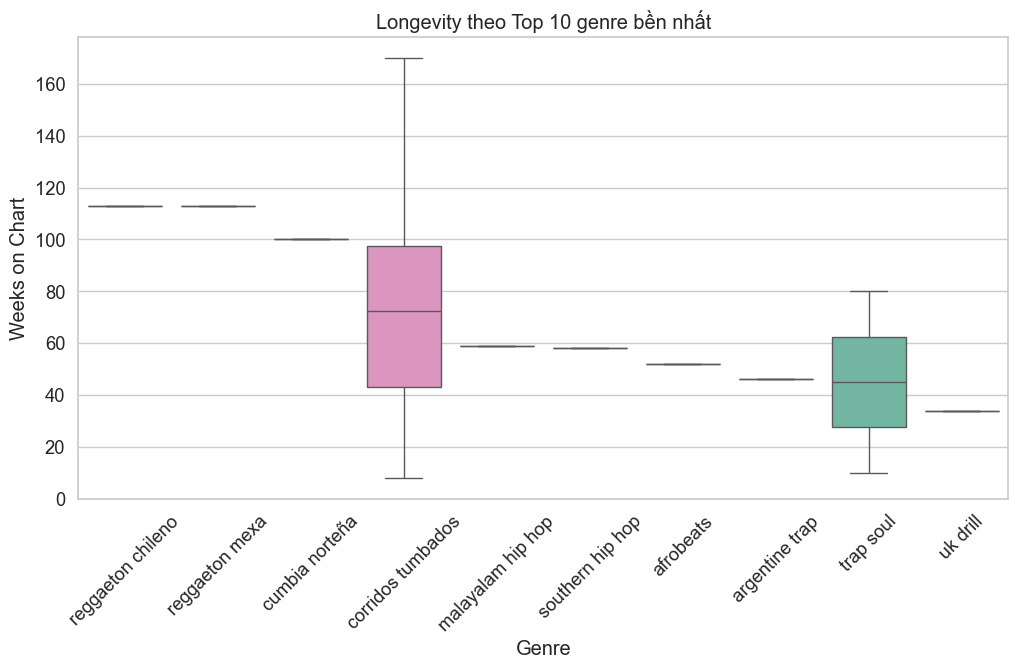

In [23]:
top10_genres = order[:10]

plt.figure(figsize=(12,6))
sns.boxplot(data=df_longevity[df_longevity['main_genre'].isin(top10_genres)], 
            x="main_genre", y="weeks_on_chart", order=top10_genres, palette="Set2")
plt.xticks(rotation=45)
plt.title("Longevity theo Top 10 genre bền nhất")
plt.xlabel("Genre")
plt.ylabel("Weeks on Chart")
plt.show()


C:\Users\nhutn\AppData\Local\Temp\ipykernel_5524\116059803.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_longevity, x="main_genre", y="weeks_on_chart", order=order, palette="Set3")


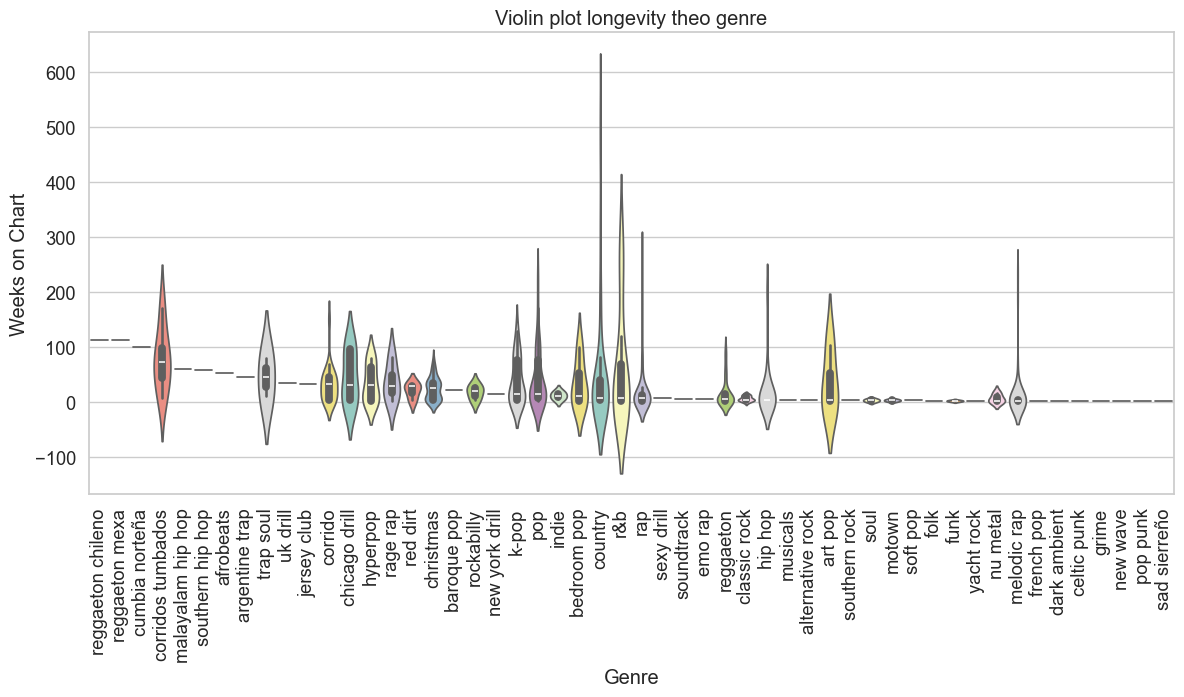

In [24]:
plt.figure(figsize=(14,6))
sns.violinplot(data=df_longevity, x="main_genre", y="weeks_on_chart", order=order, palette="Set3")
plt.xticks(rotation=90)
plt.title("Violin plot longevity theo genre")
plt.xlabel("Genre")
plt.ylabel("Weeks on Chart")
plt.show()


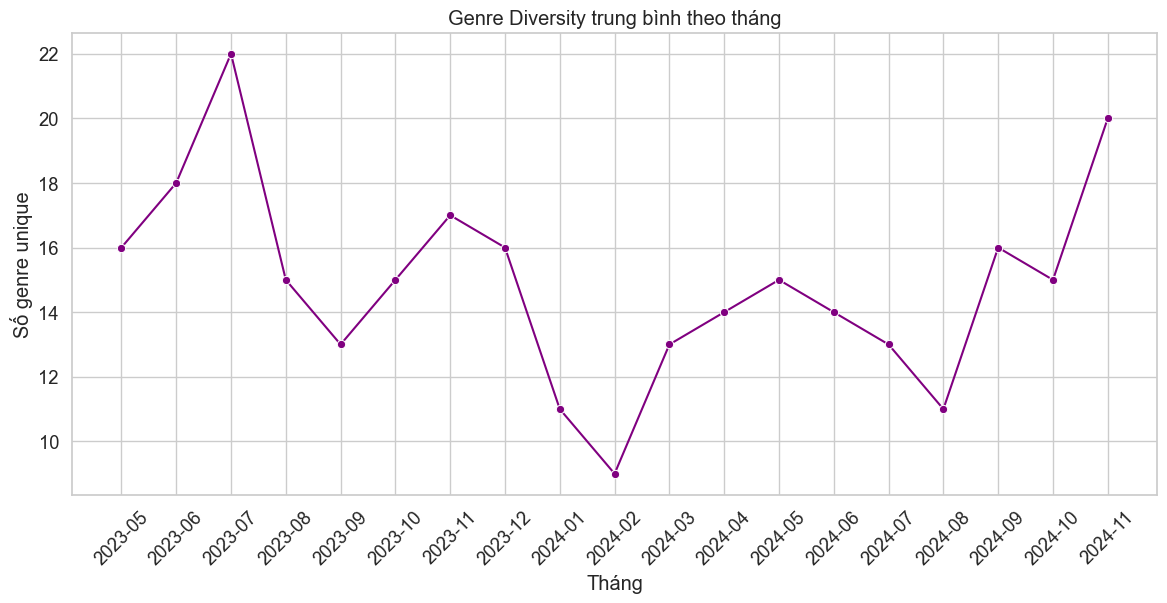

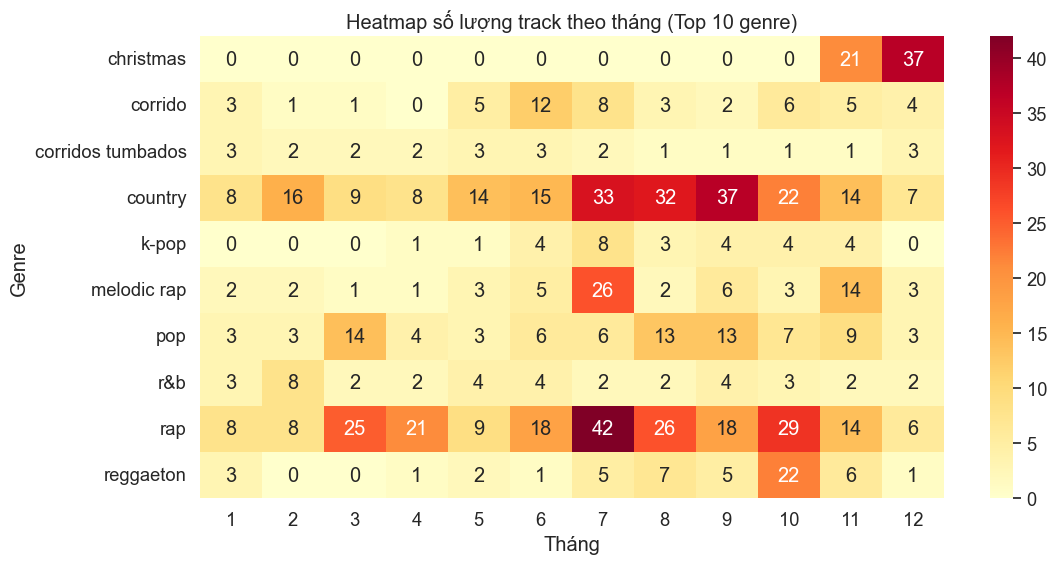

C:\Users\nhutn\AppData\Local\Temp\ipykernel_5524\2269362966.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=season_div, x='season', y='main_genre', palette="Set2")


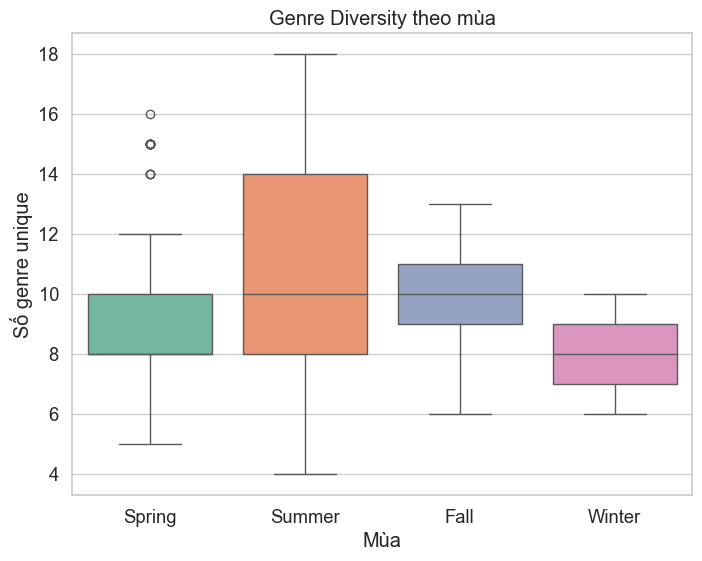

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đảm bảo cột date dạng datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Mapping tháng -> mùa
def month_to_season(month):
    if month in [12,1,2]:
        return "Winter"
    elif month in [3,4,5]:
        return "Spring"
    elif month in [6,7,8]:
        return "Summer"
    else:
        return "Fall"

df['season'] = df['month'].apply(month_to_season)

# ======================
# 1. Genre diversity theo tháng
# ======================
genre_month = df.groupby(['year','month'])['main_genre'].nunique().reset_index()
genre_month['year_month'] = genre_month['year'].astype(str) + "-" + genre_month['month'].astype(str).str.zfill(2)

plt.figure(figsize=(14,6))
sns.lineplot(data=genre_month, x='year_month', y='main_genre', marker="o", color="purple")
plt.xticks(rotation=45)
plt.title("Genre Diversity trung bình theo tháng")
plt.ylabel("Số genre unique")
plt.xlabel("Tháng")
plt.grid(True)
plt.show()

# ======================
# 2. Heatmap genre theo tháng (Top 10 genre)
# ======================
top_genres = df['main_genre'].value_counts().head(10).index
df_top = df[df['main_genre'].isin(top_genres)]

genre_heatmap = df_top.groupby(['month','main_genre'])['track_id'].nunique().unstack().fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(genre_heatmap.T, cmap="YlOrRd", annot=True, fmt=".0f")
plt.title("Heatmap số lượng track theo tháng (Top 10 genre)")
plt.xlabel("Tháng")
plt.ylabel("Genre")
plt.show()

# ======================
# 3. Boxplot Genre Diversity theo mùa
# ======================
season_div = df.groupby(['date','season'])['main_genre'].nunique().reset_index()

plt.figure(figsize=(8,6))
sns.boxplot(data=season_div, x='season', y='main_genre', palette="Set2")
plt.title("Genre Diversity theo mùa")
plt.xlabel("Mùa")
plt.ylabel("Số genre unique")
plt.show()


Các bài hát outlier theo audio features:


,track_id,song,artist,main_genre,danceability,feature,energy,valence,tempo,loudness,acousticness,speechiness,liveness
8440,3XsaSIPWvM61RIFfeb0BBR,White Christmas - 1947 Version,Bing Crosby & Fred Astaire,christmas,0.234,danceability,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9287,5hslUAKq9I9CG2bAulFkHN,It's the Most Wonderful Time of the Year,Andy Williams,christmas,0.240,danceability,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25354,4l4OfcR9UPPT06BINAxbiA,I might say something stupid featuring the 197...,Charli xcx,hyperpop,0.263,danceability,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,3WMj8moIAXJhHsyLaqIIHI,Something in the Orange,Zach Bryan,country,NaN,energy,0.192,NaN,NaN,NaN,NaN,NaN,NaN
5020,4ueTr01dkL360w1knfh21C,Oklahoman Son,Zach Bryan,country,NaN,energy,0.114,NaN,NaN,NaN,NaN,NaN,NaN
8245,1H6DXcgaTNlR9aNPjtzsjX,This Is Halloween,Various Artists,soundtrack,NaN,energy,0.153,NaN,NaN,NaN,NaN,NaN,NaN
9590,1foCxQtxBweJtZmdxhEHVO,Santa Baby (with Henri René & His Orchestra),"Eartha Kitt, Henri René and His Orchestra",christmas,NaN,energy,0.139,NaN,NaN,NaN,NaN,NaN,NaN
10424,3bMfUUpzUzqWp9II00yRhE,Christmas Time Is Here,Vince Guaraldi Trio,christmas,NaN,energy,0.122,NaN,NaN,NaN,NaN,NaN,NaN
11072,4MrfQL4TYQXJBlZYpAHTuE,"Baby, It's Cold Outside",Dean Martin,christmas,NaN,energy,0.196,NaN,NaN,NaN,NaN,NaN,NaN
11074,2FPfeYlrbSBR8PwCU0zaqq,Have Yourself A Merry Little Christmas - Remas...,Frank Sinatra,christmas,NaN,energy,0.137,NaN,NaN,NaN,NaN,NaN,NaN


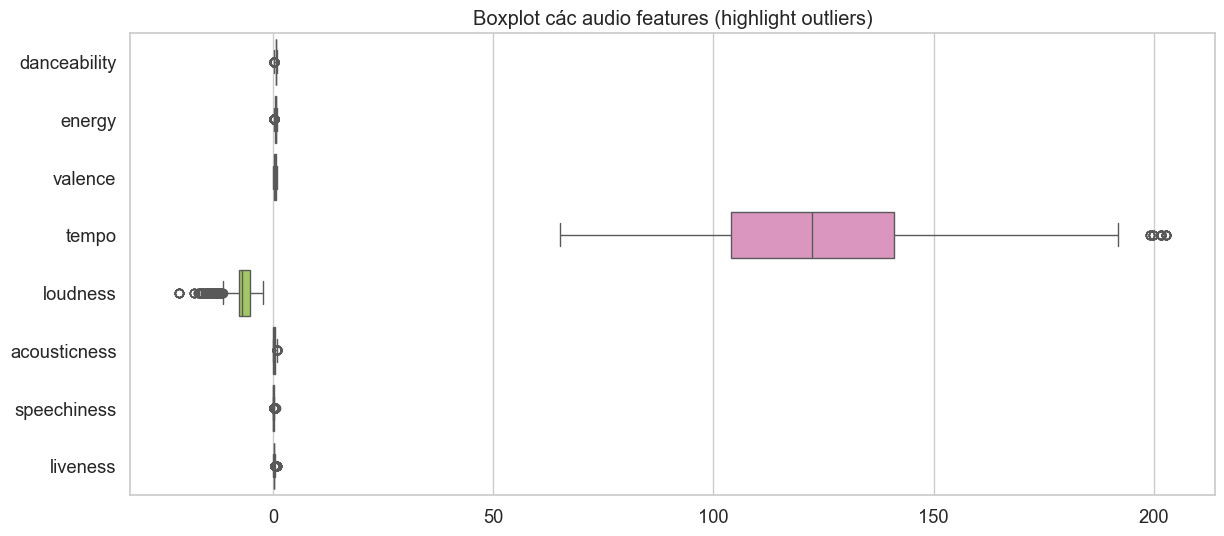

C:\Users\nhutn\AppData\Local\Temp\ipykernel_5524\1588458764.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


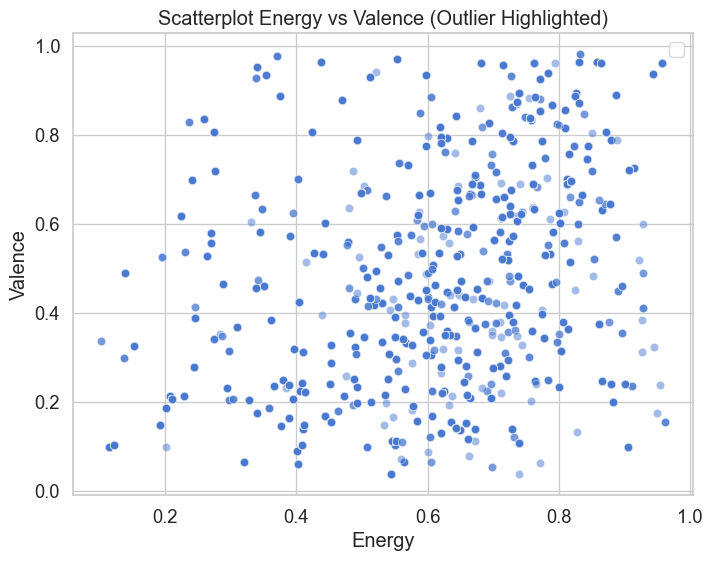

In [26]:
import numpy as np

# Các cột feature để check
features = ['danceability','energy','valence','tempo','loudness','acousticness','speechiness','liveness']

outlier_tracks = []

for feat in features:
    Q1 = df[feat].quantile(0.25)
    Q3 = df[feat].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    outliers = df[(df[feat] < lower) | (df[feat] > upper)][['track_id','song','artist','main_genre',feat]]
    outliers['feature'] = feat
    outlier_tracks.append(outliers)

outlier_df = pd.concat(outlier_tracks).drop_duplicates()

# Hiển thị top outlier
print("Các bài hát outlier theo audio features:")
display(outlier_df.head(20))

# Visualization boxplot từng feature
plt.figure(figsize=(14,6))
sns.boxplot(data=df[features], orient="h", palette="Set2")
plt.title("Boxplot các audio features (highlight outliers)")
plt.show()

# Scatter energy vs valence để highlight mood outliers
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='energy', y='valence', alpha=0.5)
sns.scatterplot(data=outlier_df, x='energy', y='valence', color="red", label="Outliers")
plt.title("Scatterplot Energy vs Valence (Outlier Highlighted)")
plt.xlabel("Energy")
plt.ylabel("Valence")
plt.legend()
plt.show()


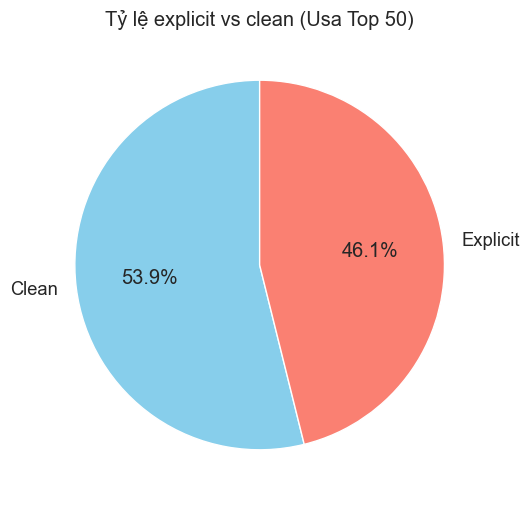

In [27]:
# Tỷ lệ explicit vs clean
explicit_counts = df['is_explicit'].value_counts(normalize=True) * 100

plt.figure(figsize=(6,6))
plt.pie(explicit_counts, labels=['Clean','Explicit'], autopct='%1.1f%%', startangle=90, colors=["skyblue","salmon"])
plt.title("Tỷ lệ explicit vs clean (Usa Top 50)")
plt.show()


C:\Users\nhutn\AppData\Local\Temp\ipykernel_5524\55758468.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_explicit', y='energy', palette="Set2")
C:\Users\nhutn\AppData\Local\Temp\ipykernel_5524\55758468.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_explicit', y='valence', palette="Set2")


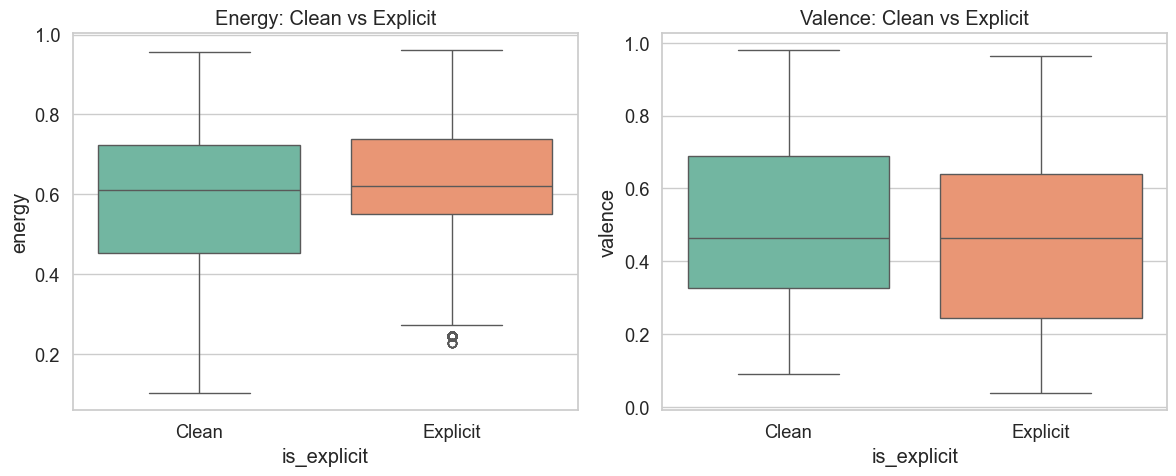

In [28]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(data=df, x='is_explicit', y='energy', palette="Set2")
plt.xticks([0,1], ["Clean","Explicit"])
plt.title("Energy: Clean vs Explicit")

plt.subplot(1,2,2)
sns.boxplot(data=df, x='is_explicit', y='valence', palette="Set2")
plt.xticks([0,1], ["Clean","Explicit"])
plt.title("Valence: Clean vs Explicit")

plt.tight_layout()
plt.show()


C:\Users\nhutn\AppData\Local\Temp\ipykernel_5524\2690721925.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=track_lifetime, x='is_explicit', y='weeks_on_chart', palette="Set1")


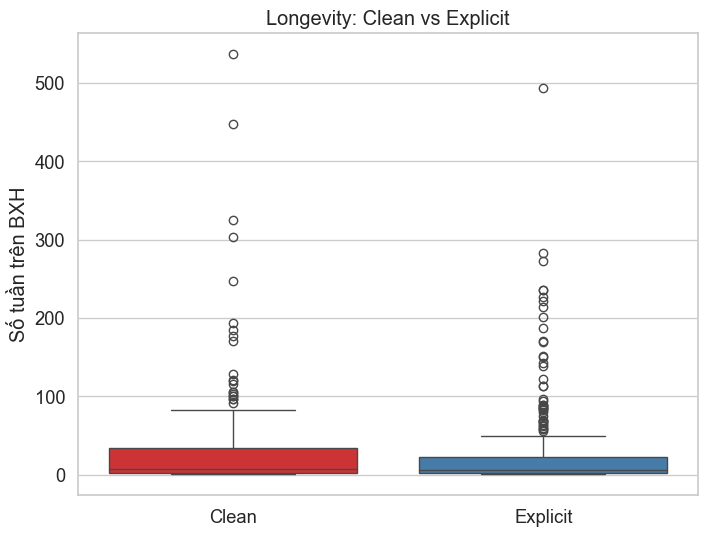

Tuổi thọ trung bình:
is_explicit
0    31.093458
1    26.171717
Name: weeks_on_chart, dtype: float64


In [29]:
# Longevity từng track
track_lifetime = df.groupby(['track_id','is_explicit'])['date'].nunique().reset_index()
track_lifetime.columns = ['track_id','is_explicit','weeks_on_chart']

plt.figure(figsize=(8,6))
sns.boxplot(data=track_lifetime, x='is_explicit', y='weeks_on_chart', palette="Set1")
plt.xticks([0,1], ["Clean","Explicit"])
plt.title("Longevity: Clean vs Explicit")
plt.xlabel("")
plt.ylabel("Số tuần trên BXH")
plt.show()

print("Tuổi thọ trung bình:")
print(track_lifetime.groupby('is_explicit')['weeks_on_chart'].mean())


C:\Users\nhutn\AppData\Local\Temp\ipykernel_5524\4287660279.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres_explicit.values, y=top_genres_explicit.index, palette="coolwarm")


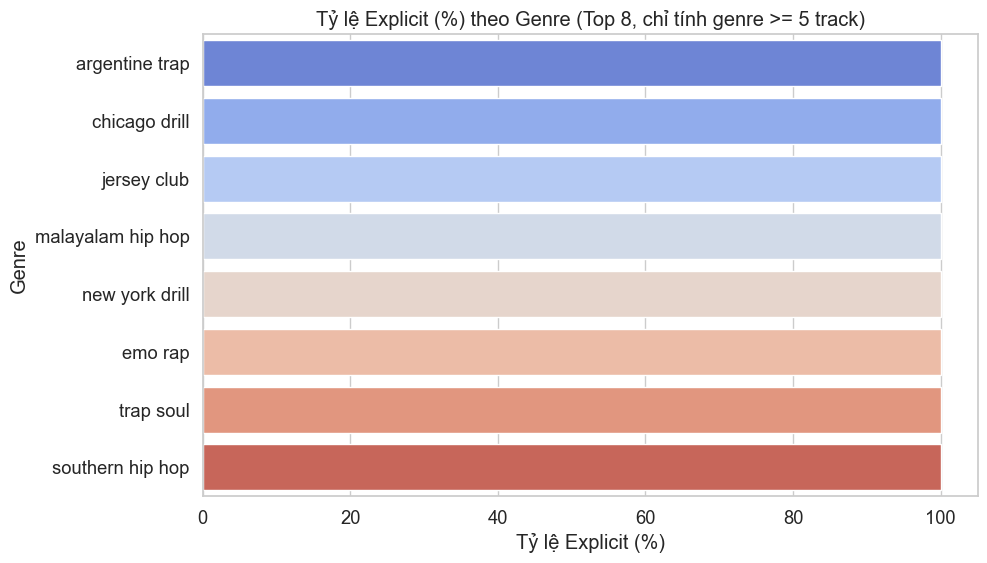

In [30]:
genre_count = df['main_genre'].value_counts()
valid_genres = genre_count[genre_count >= 5].index

genre_explicit = df[df['main_genre'].isin(valid_genres)].groupby('main_genre')['is_explicit'].mean().sort_values(ascending=False) * 100
top_genres_explicit = genre_explicit.head(8)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres_explicit.values, y=top_genres_explicit.index, palette="coolwarm")
plt.title("Tỷ lệ Explicit (%) theo Genre (Top 8, chỉ tính genre >= 5 track)")
plt.xlabel("Tỷ lệ Explicit (%)")
plt.ylabel("Genre")
plt.show()





C:\Users\nhutn\AppData\Local\Temp\ipykernel_5524\1270854213.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_explicit', y='energy', palette="Set2", ax=axes[0])
C:\Users\nhutn\AppData\Local\Temp\ipykernel_5524\1270854213.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(["Clean","Explicit"])
C:\Users\nhutn\AppData\Local\Temp\ipykernel_5524\1270854213.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_explicit', y='valence', palette="Set2", ax=axes[1])
C:\Users\nhutn\AppData\Local\Temp\ipykernel_5524\1270854213.py:8: UserWarning: set_ticklabels() sho

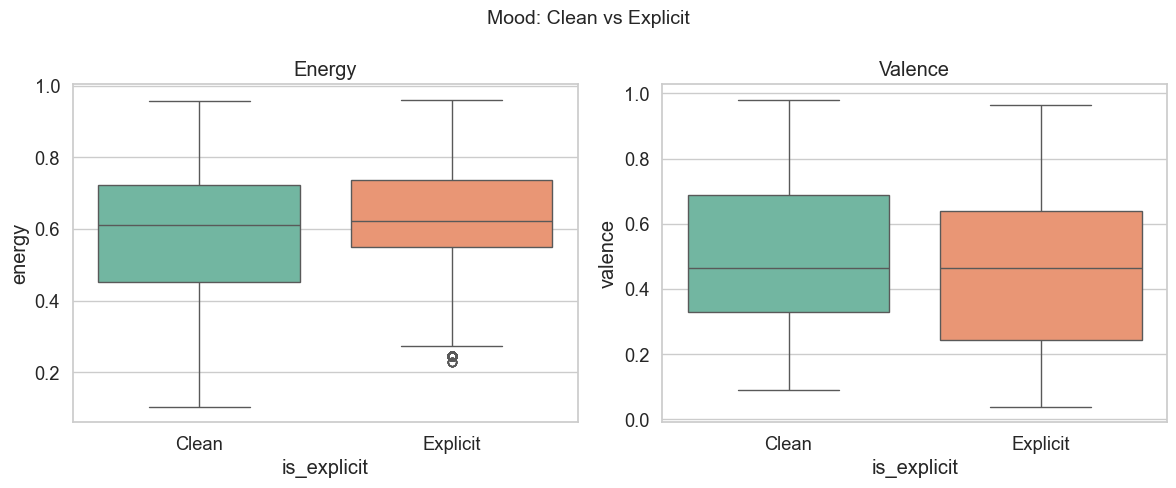

In [31]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.boxplot(data=df, x='is_explicit', y='energy', palette="Set2", ax=axes[0])
axes[0].set_xticklabels(["Clean","Explicit"])
axes[0].set_title("Energy")

sns.boxplot(data=df, x='is_explicit', y='valence', palette="Set2", ax=axes[1])
axes[1].set_xticklabels(["Clean","Explicit"])
axes[1].set_title("Valence")

fig.suptitle("Mood: Clean vs Explicit", fontsize=14)
plt.tight_layout()
plt.show()


C:\Users\nhutn\AppData\Local\Temp\ipykernel_5524\4157252350.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=track_best, x='is_explicit', y='best_rank', palette="Set3")


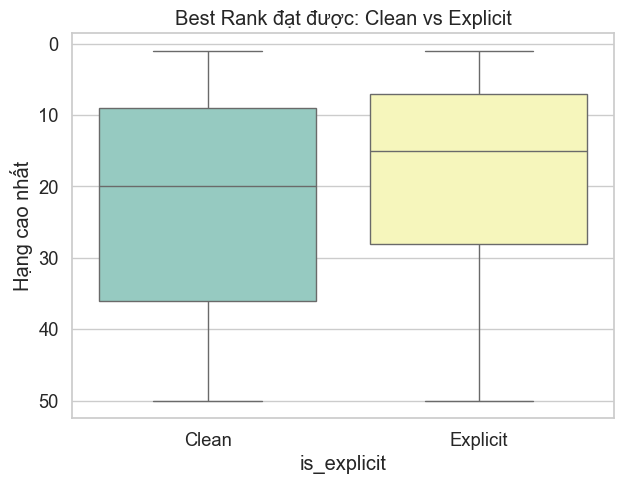

In [32]:
track_best = df.groupby(['track_id','is_explicit'])['position'].min().reset_index()
track_best.columns = ['track_id','is_explicit','best_rank']

plt.figure(figsize=(7,5))
sns.boxplot(data=track_best, x='is_explicit', y='best_rank', palette="Set3")
plt.gca().invert_yaxis()  # rank 1 trên cùng
plt.xticks([0,1], ["Clean","Explicit"])
plt.title("Best Rank đạt được: Clean vs Explicit")
plt.ylabel("Hạng cao nhất")
plt.show()
